# Лабораторная работа №1 «Генетические алгоритмы»

## Часть 1. Генерация битовых образов с предопределенными параметрами

In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

Cloning into 'Artificial-Intelligence-with-Python'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 328 (delta 20), reused 16 (delta 12), pack-reused 295
Receiving objects: 100% (328/328), 3.35 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import random

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual,
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 75

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=500)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.5, 0.2

    # Define the number of generations
    num_generations = 60

    print('\nStarting the evolution process')

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    print('\nEvaluated', len(population), 'individuals')

    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        print('Evaluated', len(invalid_ind), 'individuals')

        # The population is entirely replaced by the offspring
        population[:] = offspring

        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =',
                round(std, 2))

    print("\n==== End of evolution")

    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))



Starting the evolution process

Evaluated 500 individuals

===== Generation 0
Evaluated 297 individuals
Min = 58.0 , Max = 75.0
Average = 70.43 , Standard deviation = 2.91

===== Generation 1
Evaluated 303 individuals
Min = 63.0 , Max = 75.0
Average = 72.44 , Standard deviation = 2.16

===== Generation 2
Evaluated 310 individuals
Min = 65.0 , Max = 75.0
Average = 73.31 , Standard deviation = 1.6

===== Generation 3
Evaluated 273 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.41

===== Generation 4
Evaluated 309 individuals
Min = 68.0 , Max = 75.0
Average = 73.87 , Standard deviation = 1.35

===== Generation 5
Evaluated 312 individuals
Min = 68.0 , Max = 75.0
Average = 73.83 , Standard deviation = 1.36

===== Generation 6
Evaluated 308 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.5

===== Generation 7
Evaluated 314 individuals
Min = 67.0 , Max = 75.0
Average = 73.85 , Standard deviation = 1.39

===== Generation 8
Evaluated 3

In [ ]:
print([5.0]*10)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


## Часть 2. Визуализация хода эволюции

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

In [ ]:
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	267.771	177.951	664.621	1886.26
2  	200  	278.323	241.077	697.146	1801.67
3  	200  	218.546	137.702	513.883	1307.41
4  	200  	131.992	140.886	374.041	739.372
5  	200  	84.5236	113.862	291.389	625.977
6  	200  	66.4526	126.375	243.34 	469.926
7  	200  	49.7153	82.8412	197.511	348.043
8  	200  	38.3504	73.0274	167.743	309.409
9  	200  	37.4221	76.7296	162.881	337.876
10 	200  	31.584 	90.0571	151.457	250.642
11 	200  	28.7502	60.9416	137.673	255.886
12 	200  	30.5608	58.3516	136.254	242.471
13 	200  	28.2293	61.0749	132.133	200.212
14 	200  	24.8966	73.6083	128.44 	201.353
15 	200  	24.0441	44.6969	121.76 	184.873
16 	200  	23.8312	66.5502	117.786	183.772
17 	200  	22.3703	49.7996	118.032	173.369
18 	200  	21.2466	50.2553	111.336	164.842
19 	200  	23.693 	29.7588	110.346	167.159
20 	200  	23.1049	37.4303	108.531	166.706
21 	200  	23.6721	52.7345	112.505	158.215
22 	200  	21.6273	46.0387	108.519	15

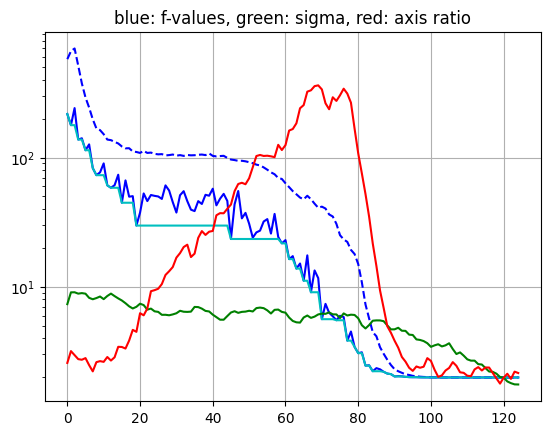

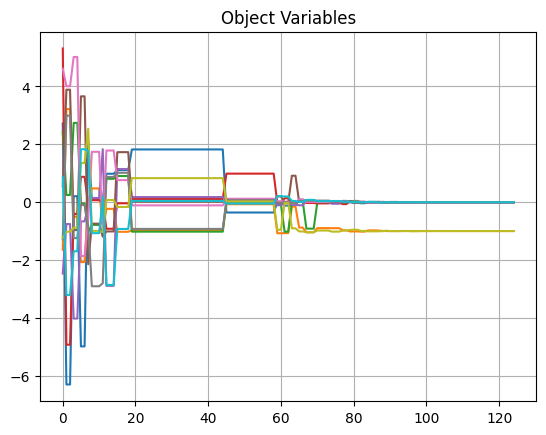

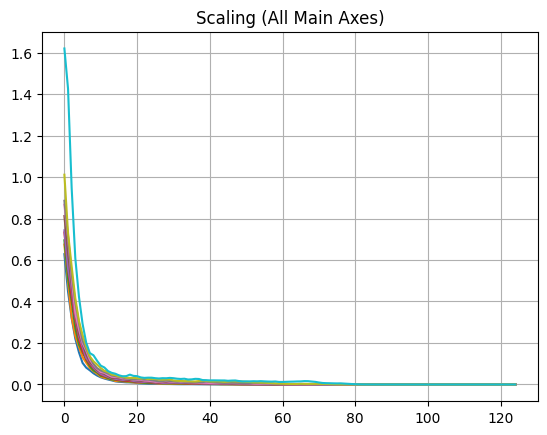

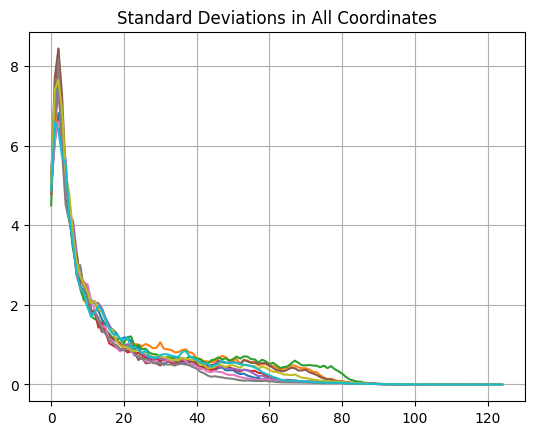

In [ ]:
if __name__ == "__main__":
    num_individuals = 10
    num_generations = 125

    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0,
            lambda_=20*num_individuals)

    toolbox = create_toolbox(strategy)

    hall_of_fame = tools.HallOfFame(1)

    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        population = toolbox.generate()

        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        toolbox.update(population)

        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()


## Часть 3. Решение задачи символической регрессии

In [ ]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (2 * x**3 - 3 * x**2 + 4 * x - 1))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)



   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	18.6918	0  	47.1923	7.39087	450   	6.27543	3.73556	0  	7  	2  	450   	1.62449
1  	251   	15.4572	1  	41.3823	4.46965	251   	4.54993	3.80222	1  	12 	1  	251   	1.81316
2  	236   	13.2545	2  	37.7223	4.46965	236   	4.06145	3.96889	2  	12 	1  	236   	1.98861
3  	251   	12.2299	3  	60.828 	4.46965	251   	4.70055	4.19556	3  	12 	1  	251   	1.9971 


/usr/local/lib/python3.10/dist-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


4  	235   	11.001 	4  	47.1923	4.46965	235   	4.48841	4.84222	4  	13 	1  	235   	2.17245
5  	229   	9.44483	5  	31.478 	4.46965	229   	3.8796 	5.56   	5  	19 	1  	229   	2.43168
6  	225   	8.35975	6  	22.0546	3.02133	225   	3.40547	6.38889	6  	15 	1  	225   	2.40875
7  	237   	7.99309	7  	31.1356	1.81133	237   	4.08463	7.14667	7  	16 	1  	237   	2.57782
8  	224   	7.42611	8  	359.418	1.17558	224   	17.0167	8.33333	8  	19 	1  	224   	3.11127
9  	237   	5.70308	9  	24.1921	1.17558	237   	3.71991	9.64444	9  	23 	1  	237   	3.31365
10 	254   	5.27991	10 	30.4315	1.13301	254   	4.13556	10.5089	10 	25 	1  	254   	3.51898
11 	223   	4.26809	11 	18.7774	0.841562	223   	3.16748	11.42  	11 	25 	1  	223   	3.69613
12 	249   	4.0672 	12 	20.6729	0.686362	249   	3.50578	12.34  	12 	27 	1  	249   	4.34843
13 	242   	5.78507	13 	1060   	0.841562	242   	49.873 	13.4089	13 	27 	1  	242   	4.24912
14 	221   	3.28494	14 	26.6665	0.841562	221   	3.31483	14.1556	14 	37 	1  	221   	4.62772
15 	243   	2.9875

In [ ]:
hall_of_fame[0]

In [ ]:
gp.graph(hall_of_fame[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [(0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (4, 7),
  (7, 8),
  (7, 9),
  (9, 10),
  (3, 11),
  (11, 12),
  (11, 13),
  (2, 14),
  (1, 15),
  (0, 16),
  (16, 17),
  (17, 18),
  (17, 19),
  (19, 20),
  (20, 21),
  (20, 22),
  (22, 23),
  (22, 24),
  (24, 25),
  (25, 26),
  (26, 27),
  (26, 28),
  (24, 29),
  (29, 30),
  (29, 31),
  (19, 32),
  (32, 33),
  (32, 34)],
 {0: 'add',
  1: 'add',
  2: 'sub',
  3: 'add',
  4: 'add',
  5: 'sin',
  6: 'x',
  7: 'division_operator',
  8: 'x',
  9: 'cos',
  10: 'x',
  11: 'add',
  12: 'x',
  13: 'x',
  14: 1,
  15: 'x',
  16: 'neg',
  17: 'mul',
  18: 'x',
  19: 'sub',
  20: 'add',
  21: 'x',
  22: 'add',
  23: 'x',
  24: 'sub',
  25: 'cos',
  26: 'sub',
  27: 0,
  28: 'x',
  29: 'sub',
  30: 0,
  31: 'x',
  32: 'mul',
  33: 'x',
  3

Количество ребер:  34
Количество вершин:  35


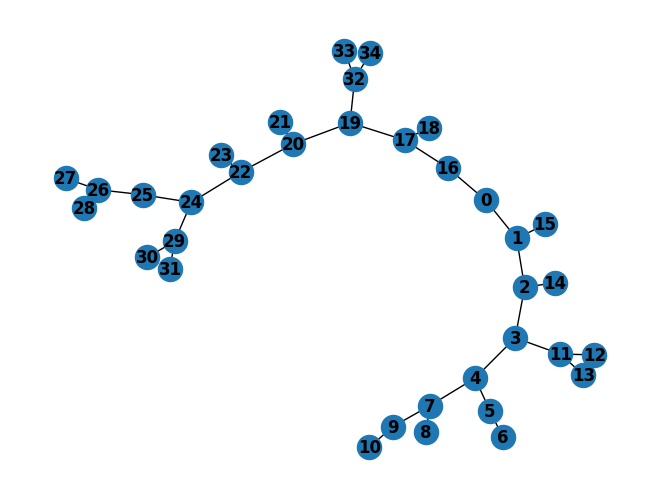

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

In [ ]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)


add(add(sub(add(add(sin(x), division_operator(x, cos(x))), add(x, x)), 1), x), neg(mul(x, sub(add(x, add(x, sub(cos(sub(0, x)), sub(0, x)))), mul(x, x)))))


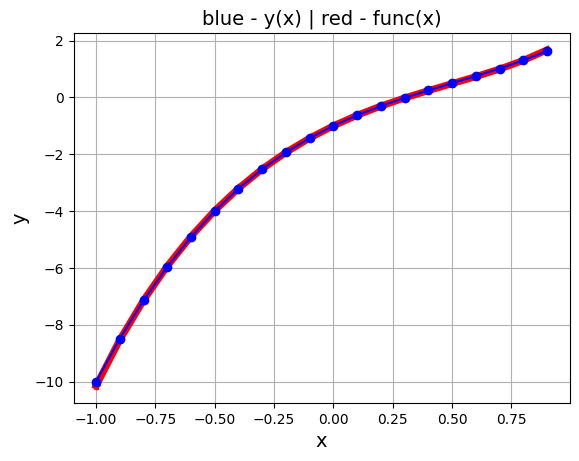

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

best_individual = hall_of_fame[0]
best_function = toolbox.compile(best_individual)
data = {'x': [], 'y': []}
import numpy as np
for i in list(np.arange(-1.0, 1.0, 0.1)):
  x = round(i, 2)
  y = 2 * x**3 - 3 * x**2 + 4*x - 1
  #y = (math.sin(x))**2 + (x - 2) * (-math.exp(x - 3)) + math.cos((x + 1)**2 + 500)
  data['x'].append(x)
  data['y'].append(y)
points = {'x': [] , 'y': []}
import numpy as np
for i in list(np.arange(-1.0, 1.0, 0.1)):
  x1 = round(i,2)
  y1 = best_function(x1)
  points['x'].append(x1)
  points['y'].append(y1)
df1 = pd.DataFrame(data)
df = pd.DataFrame(points)
plt.plot(df['x'], df['y'], color='red', marker='*', linewidth='5')
plt.plot(df1['x'], df1['y'], color='blue', marker='o')
plt.title('blue - y(x) | red - func(x)', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

## Часть 4. Создание контроллера интеллектуального робота

In [ ]:
import copy
import random
from functools import partial

import numpy as np
from deap import algorithms, base, creator, tools, gp

In [ ]:
class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.moves_done = []

        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.direction = 1
        self.moves = 0
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.moves_done = []

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
            self.moves_done.append("turn left")

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction + 1) % 4
            self.moves_done.append("turn right")

    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col

            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1

            self.matrix_exc[self.row][self.col] = "passed"
            self.moves_done.append("move_forward")

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "target"

    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)

    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())

            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")

                elif col == ".":
                    self.matrix[-1].append("empty")

                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1

        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

In [ ]:
class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2):
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):
        return partial(self._progn, out1, out2, out3)

In [ ]:
def eval_func(individual):
    global robot, pset

    routine = gp.compile(individual, pset)

    robot.run(routine)
    return robot.consumed,

In [ ]:
def create_toolbox():
    global robot, pset

    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    return toolbox

In [ ]:
if __name__ == "__main__":
    global robot

    random.seed(7)

    max_moves = 750

    robot = RobotController(max_moves)

    toolbox = create_toolbox()

    with open('/content/Artificial-Intelligence-with-Python/Chapter 08/code/target_map.txt', 'r') as f:
      robot.traverse_map(f)

    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)

    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    probab_crossover = 0.4
    probab_mutate = 0.3
    num_generations = 50

    algorithms.eaSimple(population, toolbox, probab_crossover,
            probab_mutate, num_generations, stats,
            halloffame=hall_of_fame)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	std    	min	max
0  	400   	1.4875	4.37491	0  	62 
1  	231   	4.285 	7.56993	0  	73 
2  	235   	10.8925	14.8493	0  	73 
3  	231   	21.72  	22.1239	0  	73 
4  	238   	29.9775	27.7861	0  	76 
5  	224   	37.6275	31.8698	0  	76 
6  	231   	42.845 	33.0541	0  	80 
7  	223   	43.55  	33.9369	0  	83 
8  	234   	44.0675	34.5201	0  	83 
9  	231   	49.2975	34.3065	0  	83 
10 	249   	47.075 	36.4106	0  	93 
11 	222   	52.7925	36.2826	0  	97 
12 	248   	51.0725	37.2598	0  	97 
13 	234   	54.01  	37.4614	0  	97 
14 	229   	59.615 	37.7894	0  	97 
15 	228   	63.3   	39.8205	0  	97 
16 	220   	64.605 	40.3962	0  	97 
17 	236   	62.545 	40.5607	0  	97 
18 	233   	67.99  	38.9033	0  	97 
19 	236   	66.4025	39.6574	0  	97 
20 	221   	69.785 	38.7117	0  	97 
21 	244   	65.705 	39.0957	0  	97 
22 	230   	70.32  	37.1206	0  	97 
23 	241   	67.3825	39.4028	0  	97 
24 	227   	69.265 	38.8828	0  	97 
25 	230   	68.9875	38.2422	0  	97 
26 	214   	71.505 	36.964 	0  	97 
27 	246   	72.72  	37.1

Количество ребер:  18
Количество вершин:  19


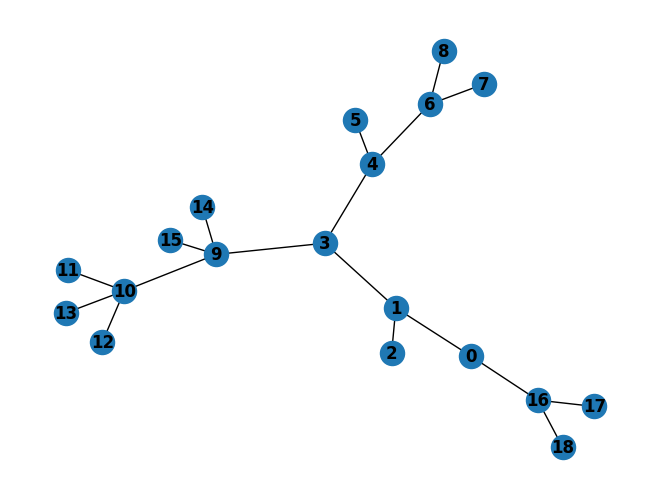

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

nodes, edges, labels = gp.graph(hall_of_fame[0])
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
print("Количество ребер: ", len(edges))
print("Количество вершин: ", len(nodes))

nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

# Лабораторная работа №2 «Создание рекомендательных систем»

## Часть 1. Создание обучающего конвейера

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# Generate data
X, y = make_classification(n_samples=150,
        n_features=25, n_classes=3, n_informative=6,
        n_redundant=0, random_state=7)


# Select top K features
k_best_selector = SelectKBest(f_regression, k=9)

# Initialize Extremely Random Forests classifier
classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4)

# Construct the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

# Set the parameters
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)

# Training the pipeline
processor_pipeline.fit(X, y)

# Predict outputs for the input data
output = processor_pipeline.predict(X)
print("\nPredicted output:\n", output)

# Print scores
print("\nScore:", processor_pipeline.score(X, y))

# Print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()

# Extract and print indices of selected features
selected = [i for i, x in enumerate(status) if x]
print("\nIndices of selected features:", ', '.join([str(x) for x in selected]))



Predicted output:
 [1 2 2 0 2 0 2 1 0 1 1 2 1 0 2 2 1 0 0 1 0 2 1 1 2 2 0 0 1 2 1 0 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 0 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 1 2 2 0 0 1 1 1 1 2 2 1 2 0 1 1
 0 2 1 1 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 2 0 1 1 2 0
 2 2]

Score: 0.8733333333333333

Indices of selected features: 4, 7, 8, 12, 14, 17, 22


In [ ]:
X

array([[ 1.01856035, -0.1850947 ,  0.33953529, ..., -0.89722827,
         2.43356744, -0.69119524],
       [-0.27783108,  0.99897481,  0.53479038, ...,  0.22153721,
         1.2023667 ,  0.30568521],
       [ 0.03110801,  1.14511831,  0.28923459, ..., -1.05191555,
         0.09786165, -0.65803802],
       ...,
       [-0.26170774,  0.83418331,  0.9540871 , ...,  0.43996139,
         1.29141862,  0.58900801],
       [ 0.09728851, -2.19374974,  0.82561751, ...,  0.19169576,
         0.38328131,  1.45836114],
       [-0.11176114, -0.44320815, -0.8666994 , ...,  1.00486657,
         0.38439339,  1.38943378]])

In [ ]:
y

array([0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2])

## Часть 2. Извлечение ближайших соседей


K Nearest Neighbors:
1 ==> [3.4 1.9]
2 ==> [5.1 2.2]
3 ==> [3.8 0.9]
4 ==> [2.9 2.5]
5 ==> [3.8 3.7]


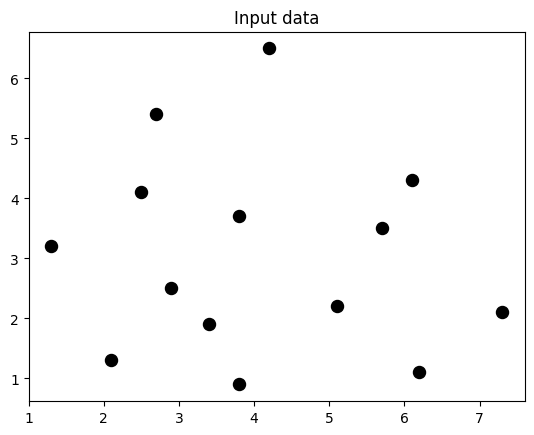

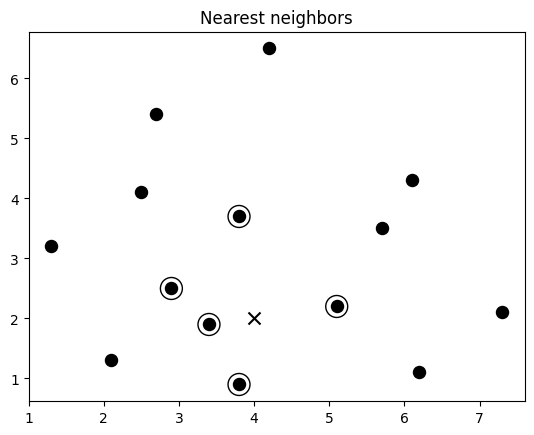

[[0.60827625 1.11803399 1.11803399 1.2083046  1.71172428]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Input data
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

# Number of nearest neighbors
k = 5

# Test datapoint
#test_datapoint = [2, 5]
test_datapoint = [4, 2]
# Plot input data
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

# Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
#knn_model = NearestNeighbors(n_neighbors=k, algorithm='kd_tree').fit(X)

distances, indices = knn_model.kneighbors([test_datapoint])

# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])

# Visualize the nearest neighbors along with the test datapoint
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],
        marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],
        marker='x', s=75, color='k')

plt.show()

print(distances)

## Часть 3. Создание классификатора методом К ближайших соседей

Predicted output: 1


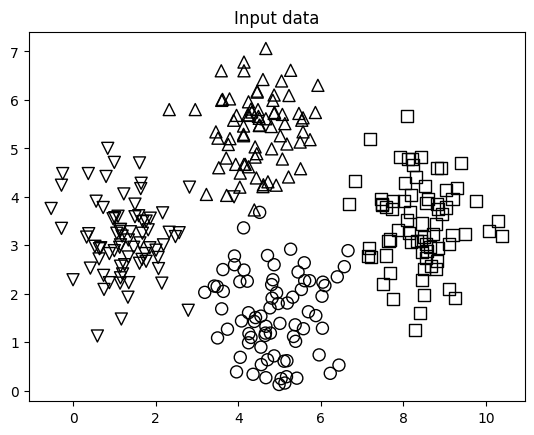

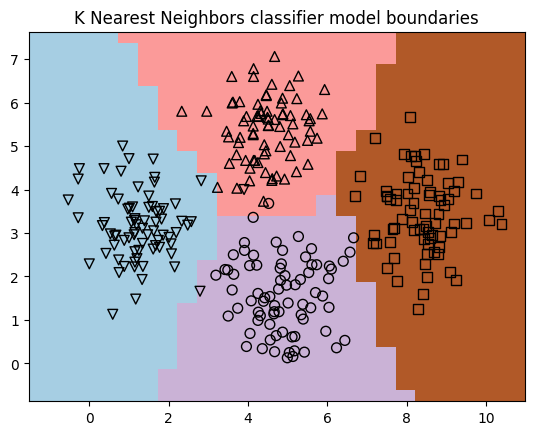

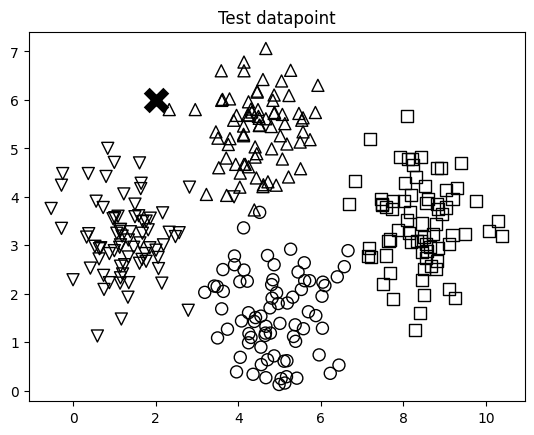

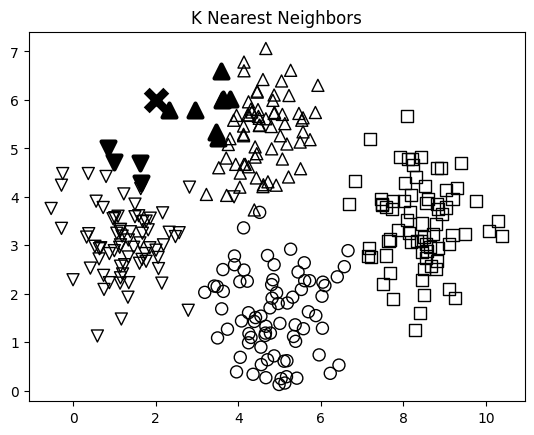

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

# Load input data
input_file = '/content/Artificial-Intelligence-with-Python/Chapter 05/code/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

# Number of nearest neighbors
num_neighbors = 12

# Step size of the visualization grid
step_size = 0.5

# Create a K Nearest Neighbours classifier model
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance', p=2)

# Train the K Nearest Neighbours model
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
        np.arange(y_min, y_max, step_size))

# Evaluate the classifier on all the points on the grid
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Test input datapoint
#test_datapoint = [5.1, 3.6]
test_datapoint = [2, 6]

plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x',
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]],
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x',
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()

## Часть 4. Вычисление оценок сходства

In [ ]:
# compute_scores.py
import argparse
import json
import numpy as np

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Compute similarity score')
    parser.add_argument('--user1', dest='user1', required=True,
            help='First user')
    parser.add_argument('--user2', dest='user2', required=True,
            help='Second user')
    parser.add_argument("--score-type", dest="score_type", required=True,
            choices=['Euclidean', 'Pearson'], help='Similarity metric to be used')
    return parser

# Compute the Euclidean distance score between user1 and user2
def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    # If there are no common movies between the users,
    # then the score is 0
    if len(common_movies) == 0:
        return 0

    squared_diff = []

    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))

    return 1 / (1 + np.sqrt(np.sum(squared_diff)))

# Compute the Pearson correlation score between user1 and user2
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # If there are no common movies between user1 and user2, then the score is 0
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

if __name__=='__main__':
    #args = build_arg_parser().parse_args()
    user1 = "Brenda Peterson" #args.user1
    user2 = "Chris Duncan" #args.user2
    score_type = "Pearson" #args.score_type

    ratings_file = '/content/Artificial-Intelligence-with-Python/Chapter 05/code/ratings.json'

    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    if score_type == 'Euclidean':
        print("\nEuclidean score:")
        print(euclidean_score(data, user1, user2))
    else:
        print("\nPearson score:")
        print(pearson_score(data, user1, user2))




Pearson score:
-1.0


## Часть 5. Поиск пользователей с похожими предпочтениями методом коллаборативной фильтрации

In [ ]:
import argparse
import json
import numpy as np

from compute_scores import pearson_score

# Compute the Pearson correlation score between user1 and user2
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # If there are no common movies between user1 and user2, then the score is 0
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Find users who are similar to the input user')
    parser.add_argument('--user', dest='user', required=True,
            help='Input user')
    return parser

# Finds users in the dataset that are similar to the input user
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find ' + user + ' in the dataset')

    # Compute Pearson score between input user
    # and all the users in the dataset
    scores = np.array([[x, pearson_score(dataset, user,
            x)] for x in dataset if x != user])

    # Sort the scores in decreasing order
    scores_sorted = np.argsort(scores[:, 1])[::-1]

    # Extract the top 'num_users' scores
    top_users = scores_sorted[:num_users]

    return scores[top_users]

if __name__=='__main__':
    ##args = build_arg_parser().parse_args()
    user = "Bill Duffy" #args.user
    user = "Clarissa Jackson" #args.user

    ratings_file = '/content/Artificial-Intelligence-with-Python/Chapter 05/code/ratings.json'

    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    print('\nUsers similar to ' + user + ':\n')
    similar_users = find_similar_users(data, user, 5)
    print('User\t\t\tSimilarity score')
    print('-'*41)
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]), 2))




Users similar to Clarissa Jackson:

User			Similarity score
-----------------------------------------
Chris Duncan 		 1.0
Bill Duffy 		 0.83
Samuel Miller 		 0.73
David Smith 		 0.69
Adam Cohen 		 0.47


## Часть 6. Создание рекомендательной системы фильмов

In [ ]:
import argparse
import json
import numpy as np

# Compute the Pearson correlation score between user1 and user2
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')

    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')

    # Movies rated by both user1 and user2
    common_movies = {}

    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1

    num_ratings = len(common_movies)

    # If there are no common movies between user1 and user2, then the score is 0
    if num_ratings == 0:
        return 0

    # Calculate the sum of ratings of all the common movies
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])

    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])

    # Calculate the sum of products of the ratings of the common movies
    sum_of_products = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

    # Calculate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings

    if Sxx * Syy == 0:
        return 0

    return Sxy / np.sqrt(Sxx * Syy)

    # Finds users in the dataset that are similar to the input user
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find ' + user + ' in the dataset')

    # Compute Pearson score between input user
    # and all the users in the dataset
    scores = np.array([[x, pearson_score(dataset, user,
            x)] for x in dataset if x != user])

    # Sort the scores in decreasing order
    scores_sorted = np.argsort(scores[:, 1])[::-1]

    # Extract the top 'num_users' scores
    top_users = scores_sorted[:num_users]

    return scores[top_users]

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Find the movie recommendations for the given user')
    parser.add_argument('--user', dest='user', required=True,
            help='Input user')
    return parser

# Get movie recommendations for the input user
def get_recommendations(dataset, input_user):
    if input_user not in dataset:
        raise TypeError('Cannot find ' + input_user + ' in the dataset')

    overall_scores = {}
    similarity_scores = {}

    for user in [x for x in dataset if x != input_user]:
        similarity_score = pearson_score(dataset, input_user, user)

        if similarity_score <= 0:
            continue

        filtered_list = [x for x in dataset[user] if x not in \
                dataset[input_user] or dataset[input_user][x] == 0]

        for item in filtered_list:
            overall_scores.update({item: dataset[user][item] * similarity_score})
            similarity_scores.update({item: similarity_score})

    if len(overall_scores) == 0:
        return ['No recommendations possible']

    # Generate movie ranks by normalization
    movie_scores = np.array([[score/similarity_scores[item], item]
            for item, score in overall_scores.items()])

    # Sort in decreasing order
    movie_scores = movie_scores[np.argsort(movie_scores[:, 0])[::-1]]

    # Extract the movie recommendations
    movie_recommendations = [movie for _, movie in movie_scores]

    return movie_recommendations

if __name__=='__main__':
    #args = build_arg_parser().parse_args()
    user = 'Chris Duncan' #args.user

    ratings_file = '/content/Artificial-Intelligence-with-Python/Chapter 05/code/ratings.json'

    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    print("\nMovie recommendations for " + user + ":")
    movies = get_recommendations(data, user)
    for i, movie in enumerate(movies):
        print(str(i+1) + '. ' + movie)




Movie recommendations for Chris Duncan:
1. Vertigo
2. Scarface
3. Goodfellas
4. Roman Holiday


# Лабораторная работа №3 «Искусственные нейронные сети»

##Часть 1. Создание классификатора на основе персептрона

In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

fatal: destination path 'Artificial-Intelligence-with-Python' already exists and is not an empty directory.


In [ ]:
!pip install neurolab

The goal of learning is reached


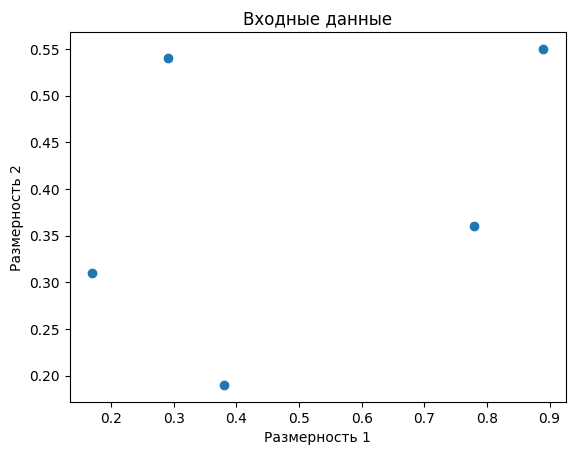

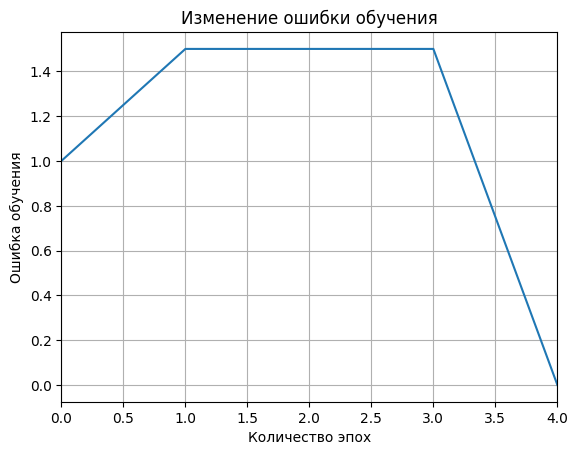

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Load input data
text = np.loadtxt('/content/Artificial-Intelligence-with-Python/Chapter 14/code/data_perceptron.txt')

# Разделение точек данных и меток
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

# Построение графика входных данных
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')

# Определение максимального и минимального значений
# для каждого измерения
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

# Количество нейронов в выходном слое
num_output = labels.shape[1]

# Определение перцептрона с двумя входными нейронами (поскольку # входные данные двумерные)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

# Тренировка перцептрона с использованием наших данных
error_progress = perceptron.train(data, labels, epochs=100, show=20, lr=0.03)

# Построение графика процесса обучения
plt.figure()
plt.plot (error_progress)
plt.xlabel('Количество эпох')
plt.ylabel('Ошибка обучения')
plt.title('Изменение ошибки обучения')
plt.grid()
plt.xlim(0, 4)
plt.show()

## Часть 2. Построение однослойной нейронной сети

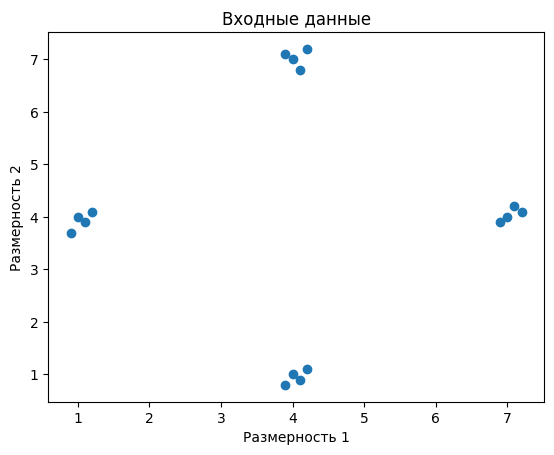

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


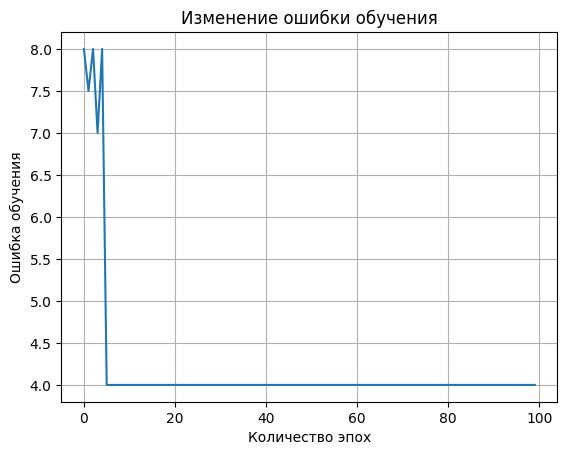


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

text = np.loadtxt('/content/Artificial-Intelligence-with-Python/Chapter 14/code/data_simple_nn.txt')

data = text[:, 0:2]
labels = text[:, 2:]

plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')
plt.show()

dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

num_output = labels.shape[1]

dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

plt.plot(error_progress)
plt.xlabel('Количество эпох')
plt.ylabel('Ошибка обучения')
plt.title('Изменение ошибки обучения')
plt.grid()
plt.show()

print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])

## Часть 3. Построение многослойной нейронной сети

In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

fatal: destination path 'Artificial-Intelligence-with-Python' already exists and is not an empty directory.


In [ ]:
!pip install neurolab

Epoch: 100; Error: 0.3817275847917545;
Epoch: 200; Error: 0.027054121593109548;
Epoch: 300; Error: 0.1258337047264926;
Epoch: 400; Error: 0.02904625348129517;
Epoch: 500; Error: 0.07263370330689087;
Epoch: 600; Error: 0.03160545956235038;
Epoch: 700; Error: 0.037276534763491145;
Epoch: 800; Error: 0.021510008430622663;
Epoch: 900; Error: 0.021538943988167823;
Epoch: 1000; Error: 0.013455796734365602;
Epoch: 1100; Error: 0.012864367881213772;
Epoch: 1200; Error: 0.012968117956586013;
Epoch: 1300; Error: 0.01093252597052586;
Epoch: 1400; Error: 0.010046600002708704;
Epoch: 1500; Error: 0.010311792411112432;
Epoch: 1600; Error: 0.010140658487204409;
The goal of learning is reached


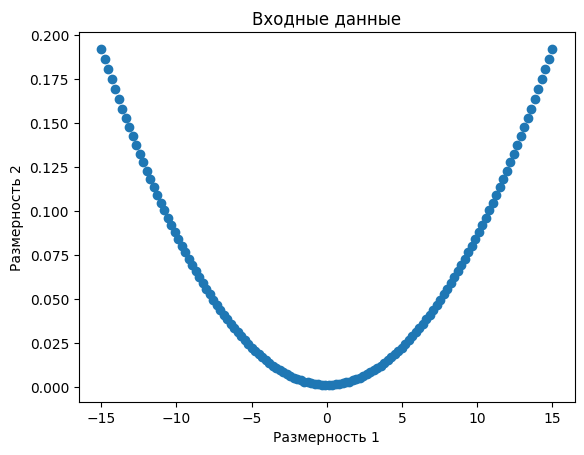

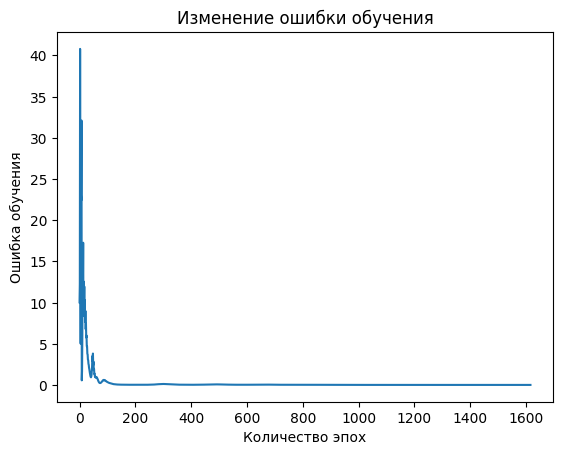

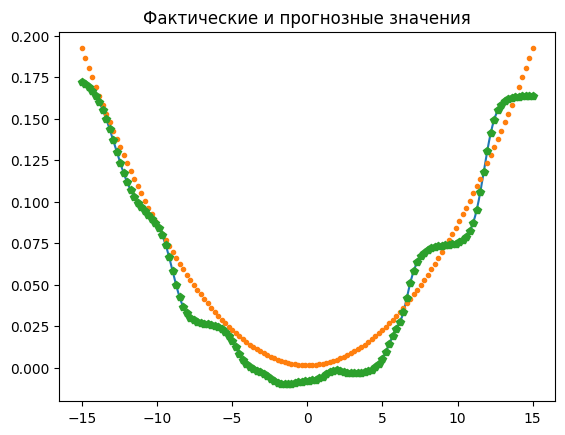

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Генерация тренировочных данных
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

# Создание данных и меток
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

# Построение графика входных данных
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Входные данные')

# Определение многослойной нейронной сети с двумя скрытыми
# слоями. Первый скрытый слой состоит из десяти нейронов.
# Второй скрытый слой состоит из шести нейронов.
# Выходной слой состоит из одного нейрона.
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Задание градиентного спуска в качестве обучающего алгоритма
nn.trainf = nl.train.train_gd

# Тренировка нейронной сети
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

# Выполнение нейронной сети на тренировочных данных
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Построение графика ошибки обучения
plt.figure()
plt.plot(error_progress)
plt.xlabel('Количество эпох')
plt.ylabel('Ошибка обучения')
plt.title('Изменение ошибки обучения')
plt.show()

# Построение графика результатов
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Фактические и прогнозные значения')
plt.show()

## Часть 4. Создание векторного квантизатора

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

text = np.loadtxt('/content/Artificial-Intelligence-with-Python/Chapter 14/code/data_vector_quantization.txt')

data = text[:, 0:2]
labels = text[:, 2:]

num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

_ = nn.train(data, labels, epochs=500, goal=-1)

xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

grid_eval = nn.sim(grid_xy)

class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

plt.plot(class_1[:,0], class_1[:,1], 'ko',
        class_2[:,0], class_2[:,1], 'ko',
        class_3[:,0], class_3[:,1], 'ko',
        class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^',
        grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Размерность 1')
plt.ylabel('Размерность 2')
plt.title('Векторная квантизация')
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

## Часть 5. Анализ последовательных данных с помощью рекуррентных нейронных сетей

In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

fatal: destination path 'Artificial-Intelligence-with-Python' already exists and is not an empty directory.


In [ ]:
!pip install neurolab

Epoch: 100; Error: 0.8162610071649379;
Epoch: 200; Error: 0.6063841995309008;
Epoch: 300; Error: 0.37901558883587533;
Epoch: 400; Error: 0.503133479619544;
Epoch: 500; Error: 0.10597638541260743;
Epoch: 600; Error: 0.08362099379254444;
Epoch: 700; Error: 0.05047703933533336;
Epoch: 800; Error: 0.09553155434369988;
Epoch: 900; Error: 0.07498049668376693;
Epoch: 1000; Error: 0.044270881384416136;
Epoch: 1100; Error: 0.04974892796791284;
Epoch: 1200; Error: 0.04348993375352991;
The maximum number of train epochs is reached


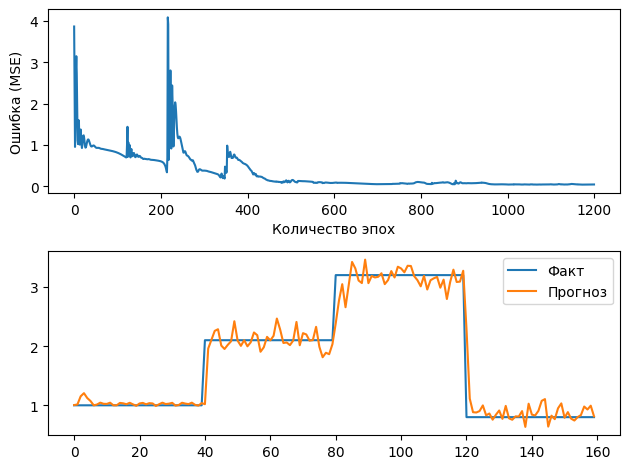

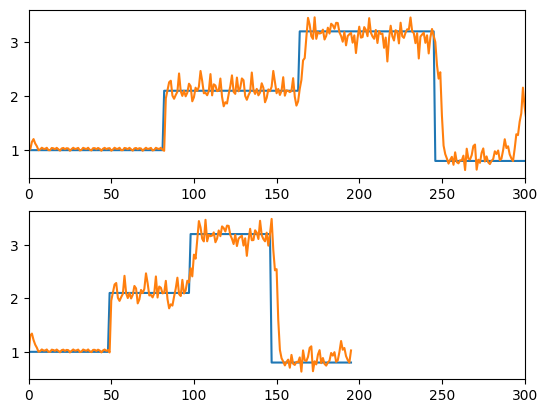

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

def get_data(num_points):
    # Создание синусоидальных волн
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))

    # Создание переменных амплитуд
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)

    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)

    return wave, amp

# Визуализация выходного сигнала
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

if __name__=='__main__':
    # Создание выборочных данных
    num_points = 40
    wave, amp = get_data(num_points)

    # Создание рекуррентной нейронной сети с двумя слоями
    nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

    # Задание функций инициализации для каждого слоя
    nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    nn.init()

    # Обучение рекуррентной нейронной сети
    error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

    # Прогонка тренировочных данных через сеть
    output = nn.sim(wave)

    # Построение графика результатов
    plt.subplot(211)
    plt.plot(error_progress)
    plt.xlabel('Количество эпох')
    plt.ylabel('Ошибка (MSE)')

    plt.subplot(212)
    plt.plot(amp.reshape(num_points * 4))
    plt.plot(output.reshape(num_points * 4))
    plt.legend(['Факт', 'Прогноз'])
    plt.tight_layout()

    # Тестирование нейронной сети на неизвестных данных
    plt.figure()

    plt.subplot(211)
    visualize_output(nn, 82)
    plt.xlim([0, 300])

    plt.subplot(212)
    visualize_output(nn, 49)
    plt.xlim([0, 300])
    plt.show()

## Часть 6. Визуализация символов с использованием базы данных оптического распознавания символов

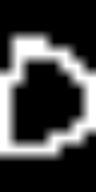

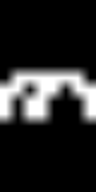

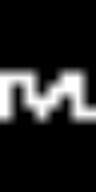

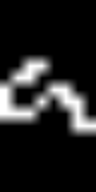

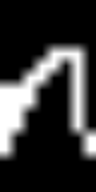

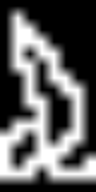

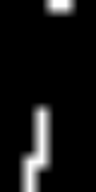

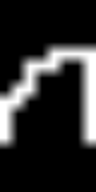

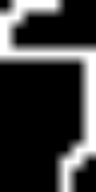

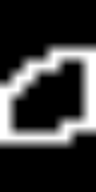

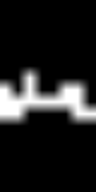

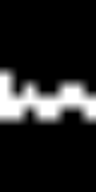

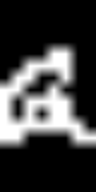

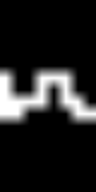

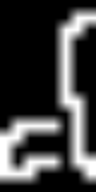

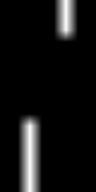

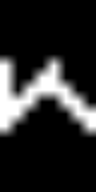

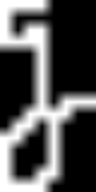

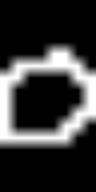

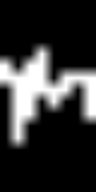

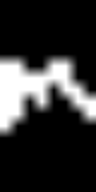

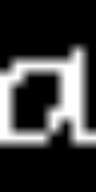

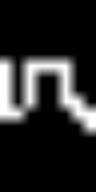

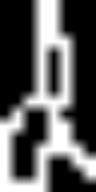

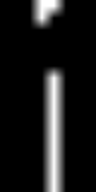

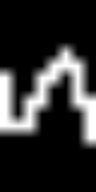

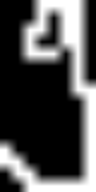

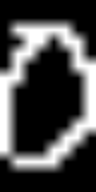

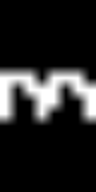

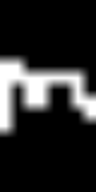

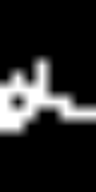

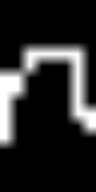

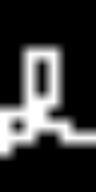

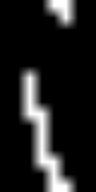

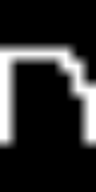

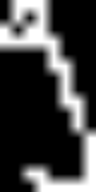

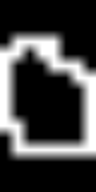

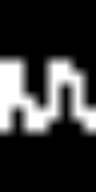

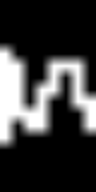

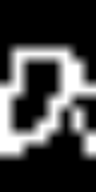

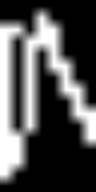

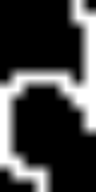

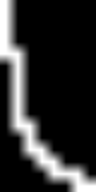

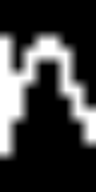

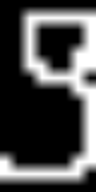

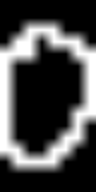

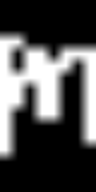

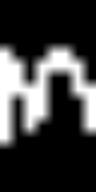

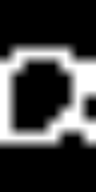

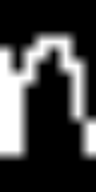

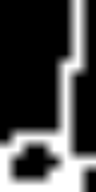

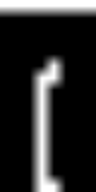

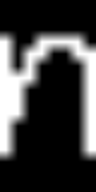

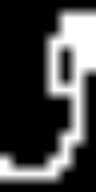

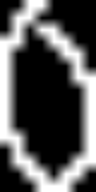

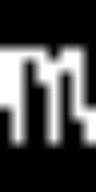

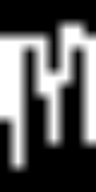

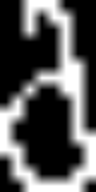

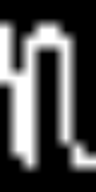

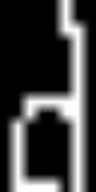

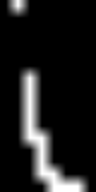

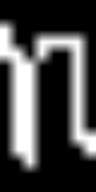

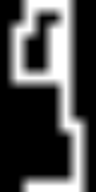

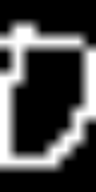

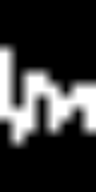

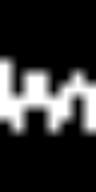

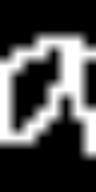

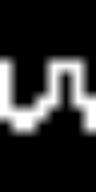

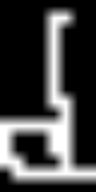

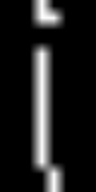

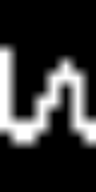

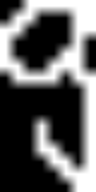

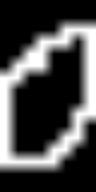

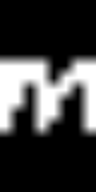

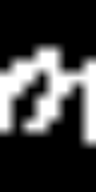

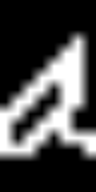

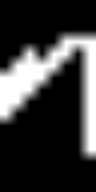

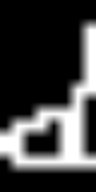

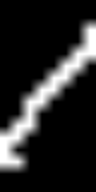

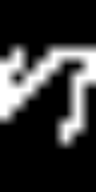

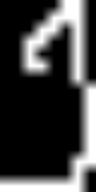

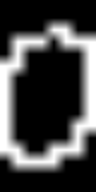

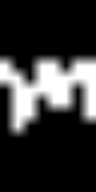

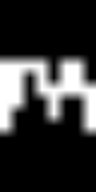

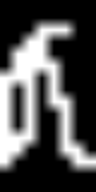

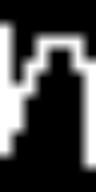

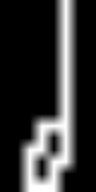

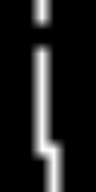

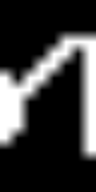

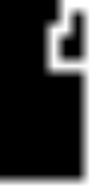

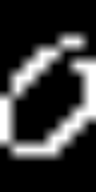

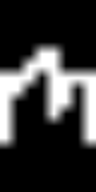

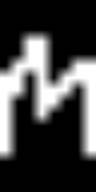

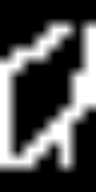

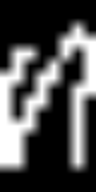

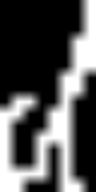

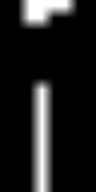

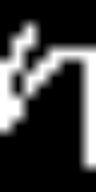

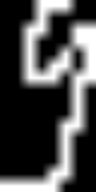

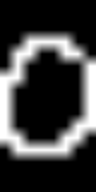

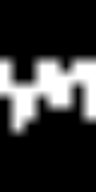

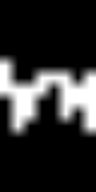

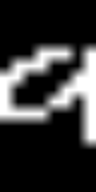

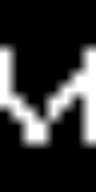

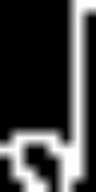

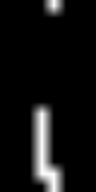

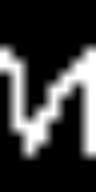

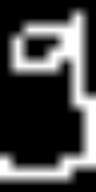

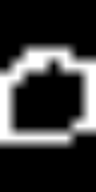

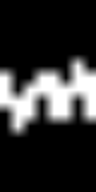

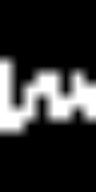

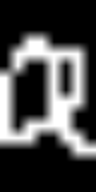

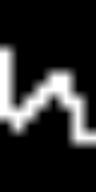

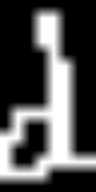

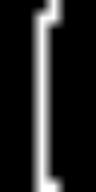

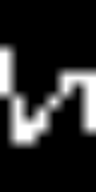

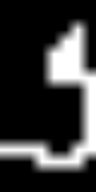

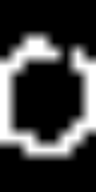

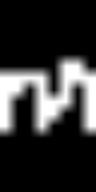

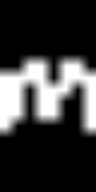

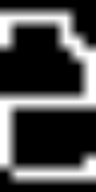

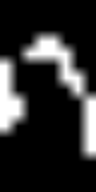

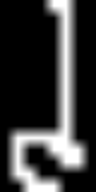

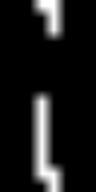

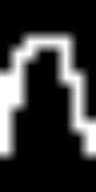

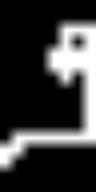

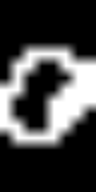

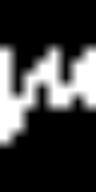

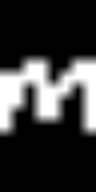

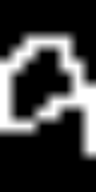

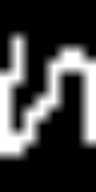

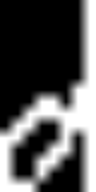

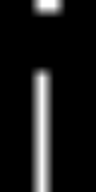

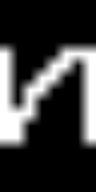

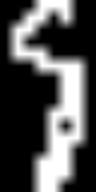

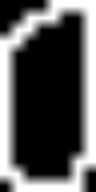

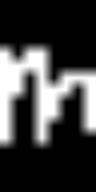

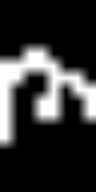

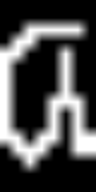

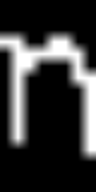

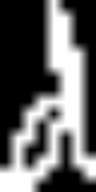

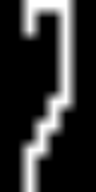

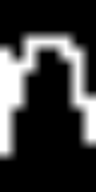

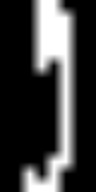

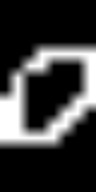

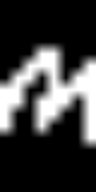

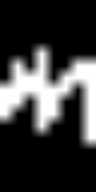

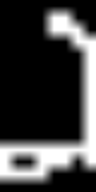

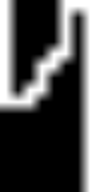

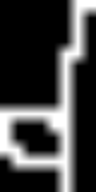

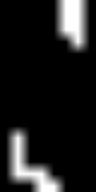

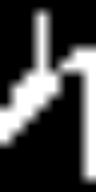

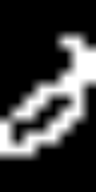

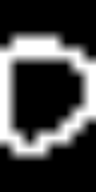

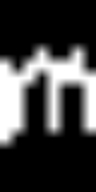

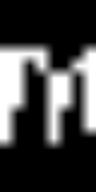

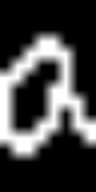

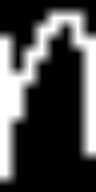

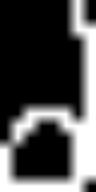

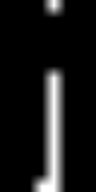

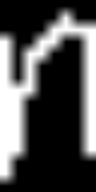

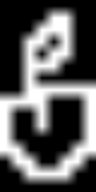

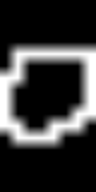

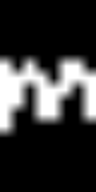

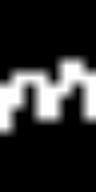

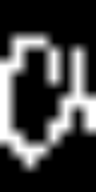

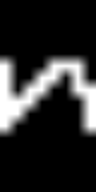

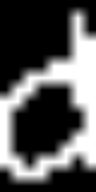

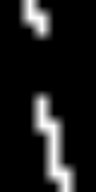

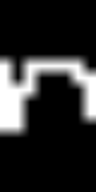

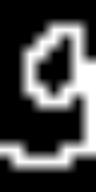

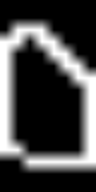

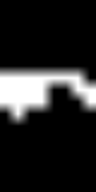

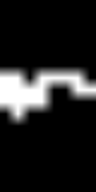

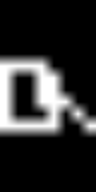

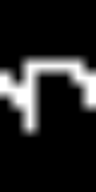

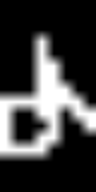

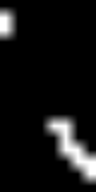

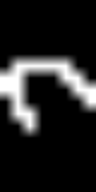

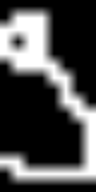

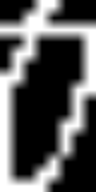

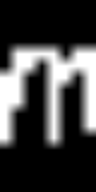

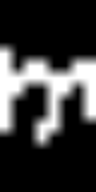

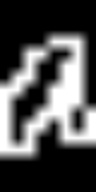

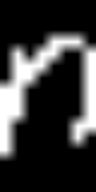

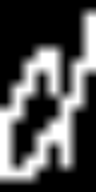

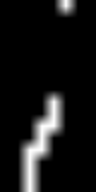

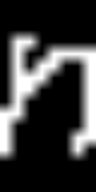

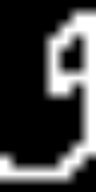

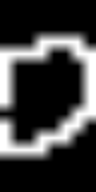

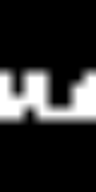

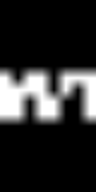

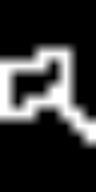

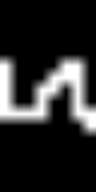

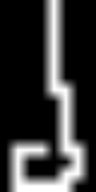

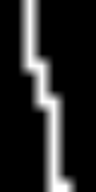

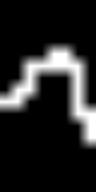

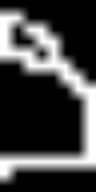

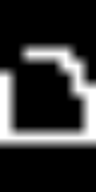

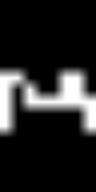

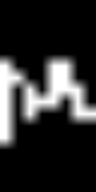

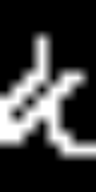

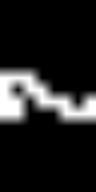

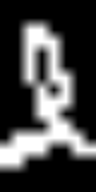

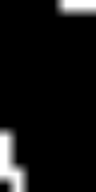

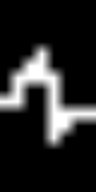

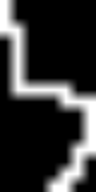

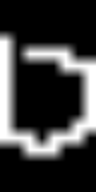

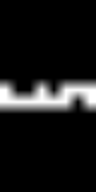

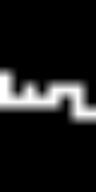

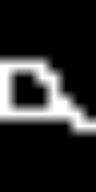

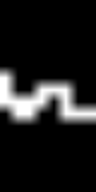

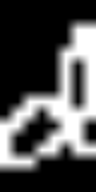

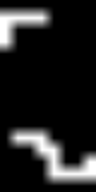

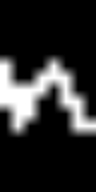

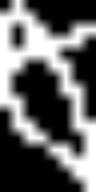

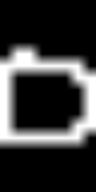

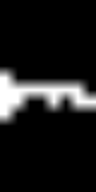

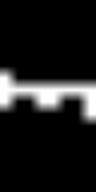

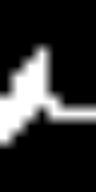

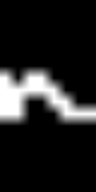

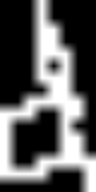

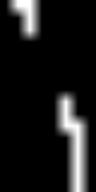

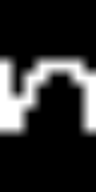

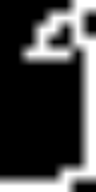

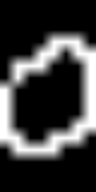

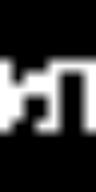

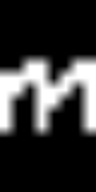

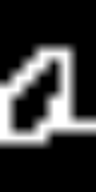

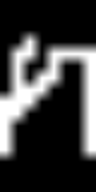

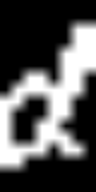

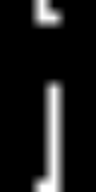

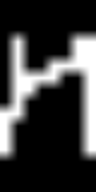

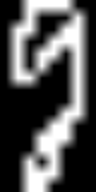

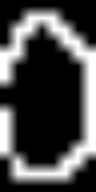

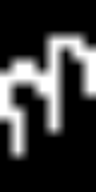

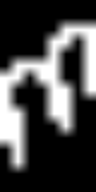

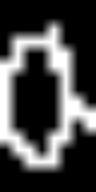

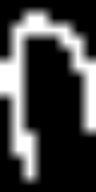

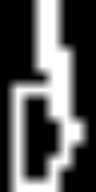

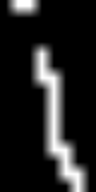

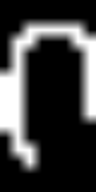

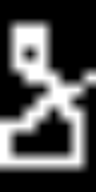

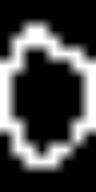

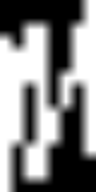

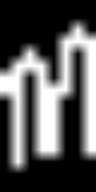

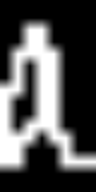

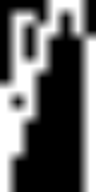

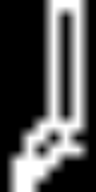

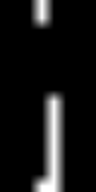

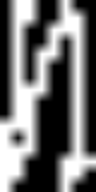

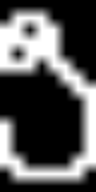

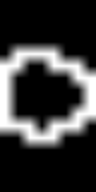

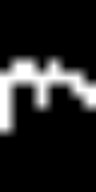

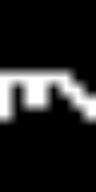

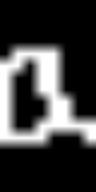

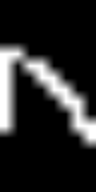

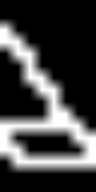

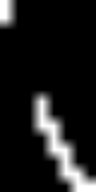

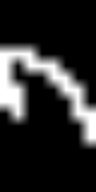

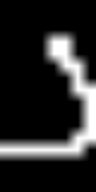

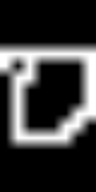

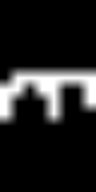

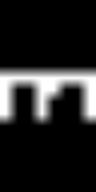

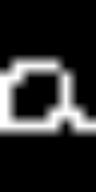

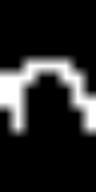

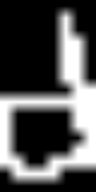

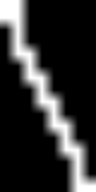

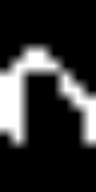

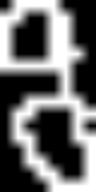

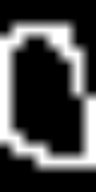

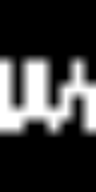

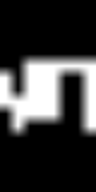

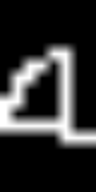

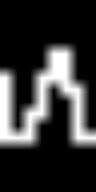

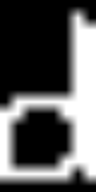

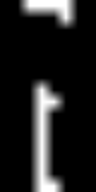

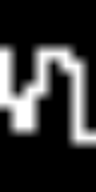

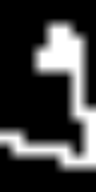

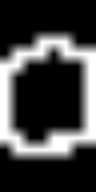

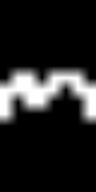

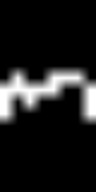

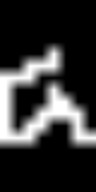

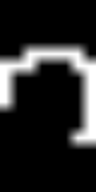

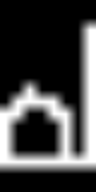

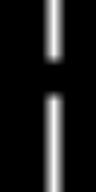

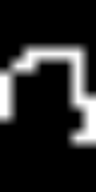

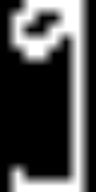

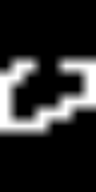

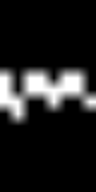

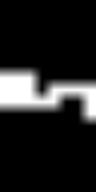

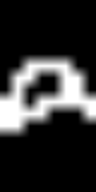

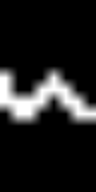

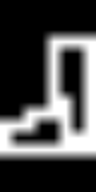

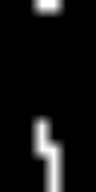

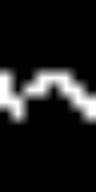

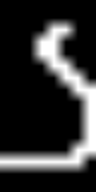

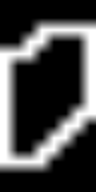

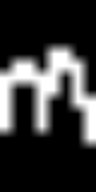

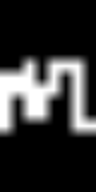

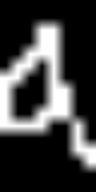

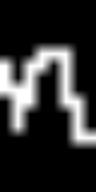

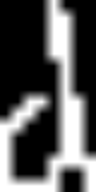

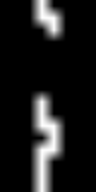

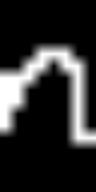

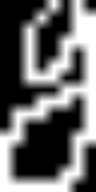

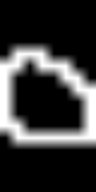

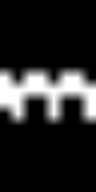

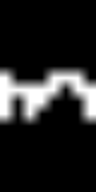

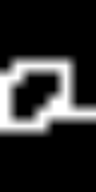

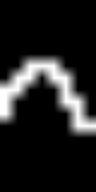

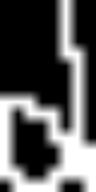

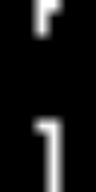

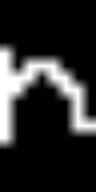

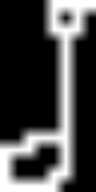

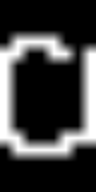

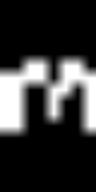

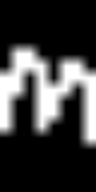

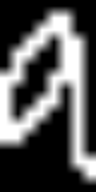

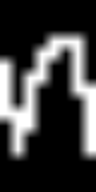

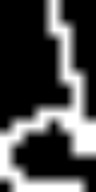

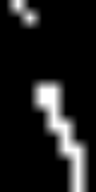

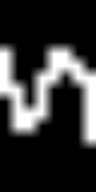

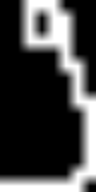

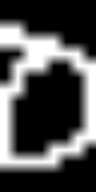

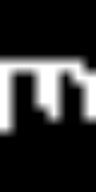

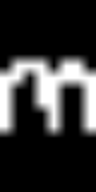

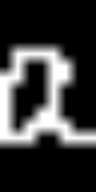

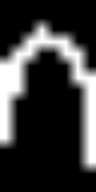

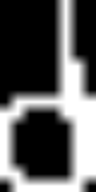

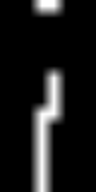

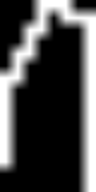

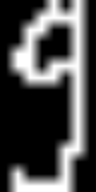

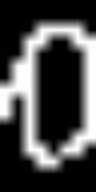

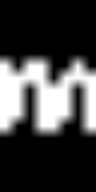

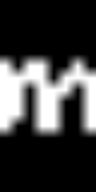

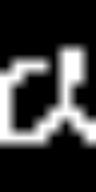

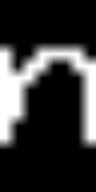

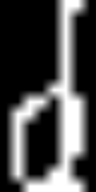

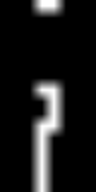

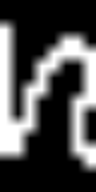

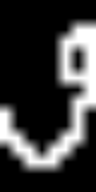

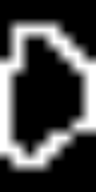

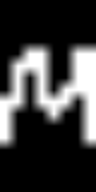

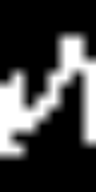

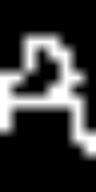

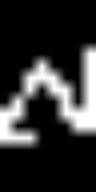

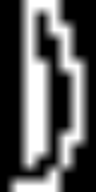

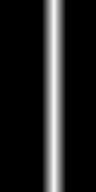

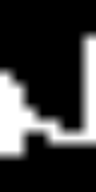

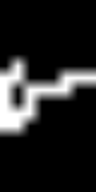

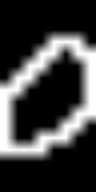

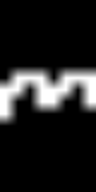

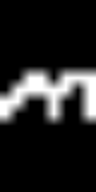

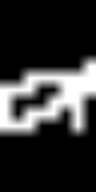

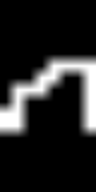

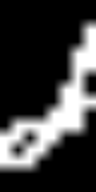

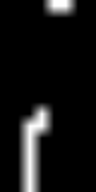

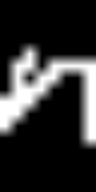

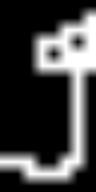

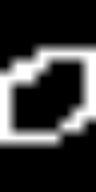

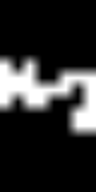

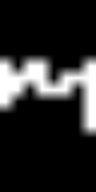

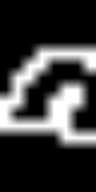

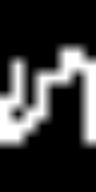

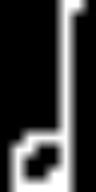

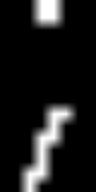

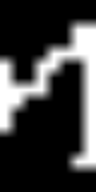

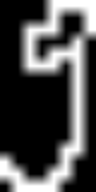

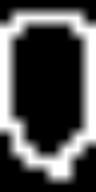

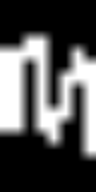

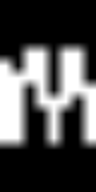

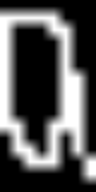

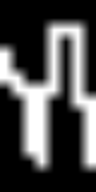

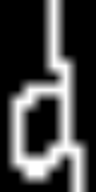

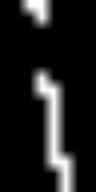

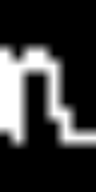

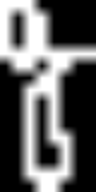

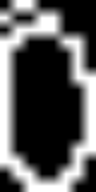

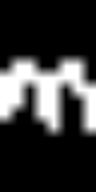

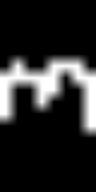

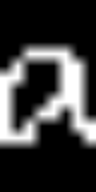

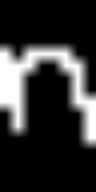

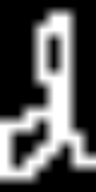

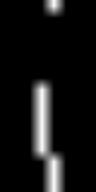

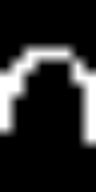

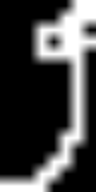

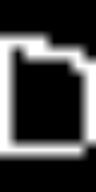

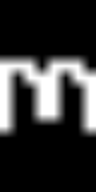

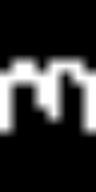

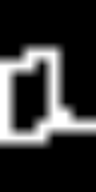

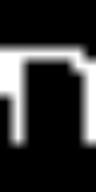

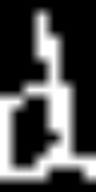

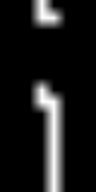

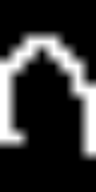

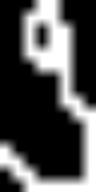

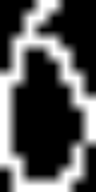

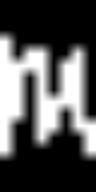

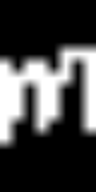

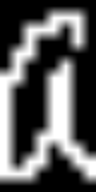

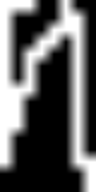

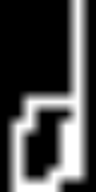

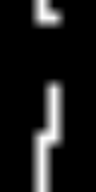

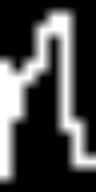

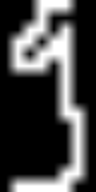

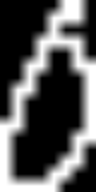

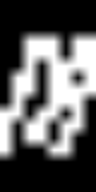

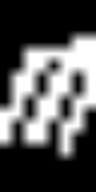

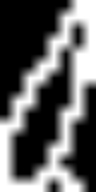

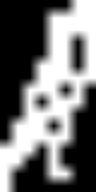

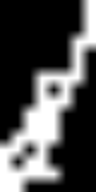

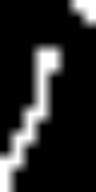

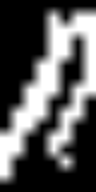

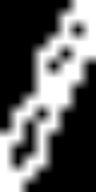

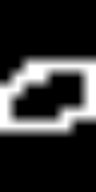

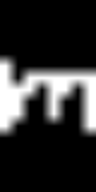

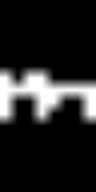

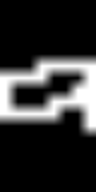

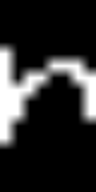

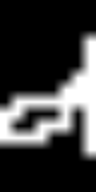

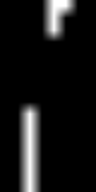

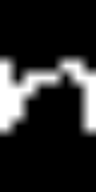

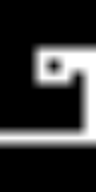

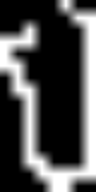

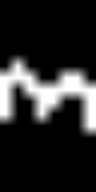

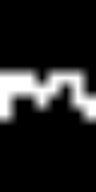

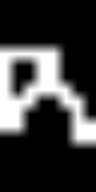

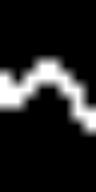

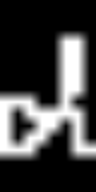

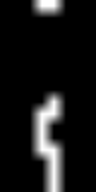

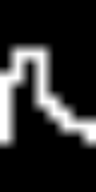

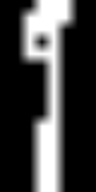

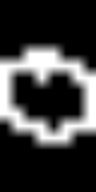

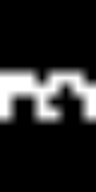

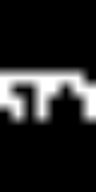

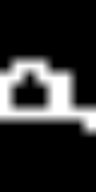

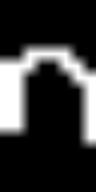

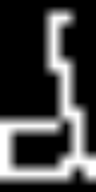

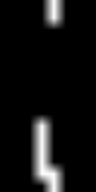

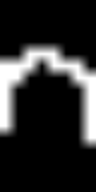

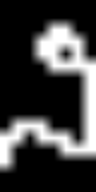

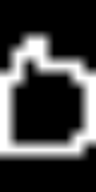

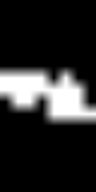

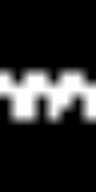

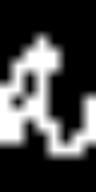

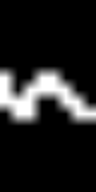

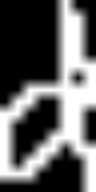

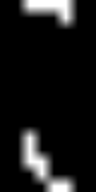

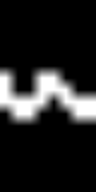

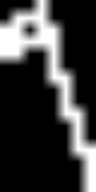

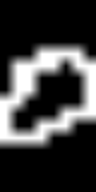

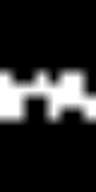

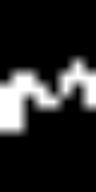

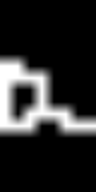

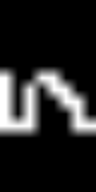

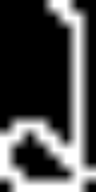

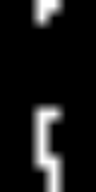

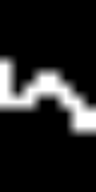

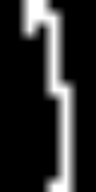

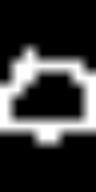

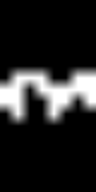

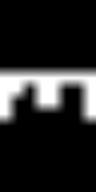

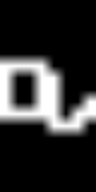

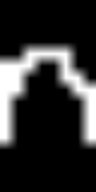

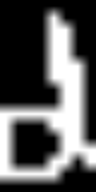

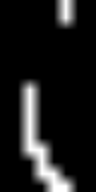

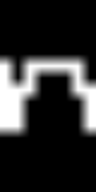

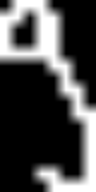

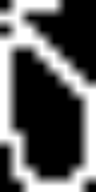

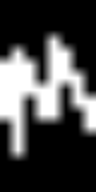

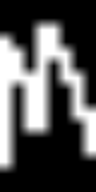

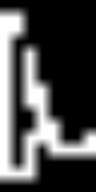

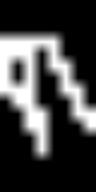

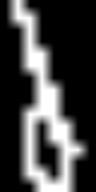

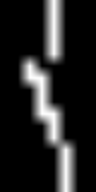

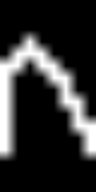

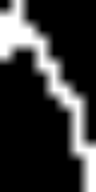

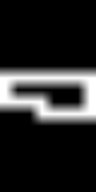

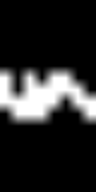

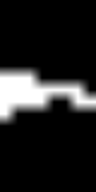

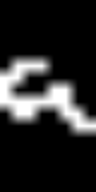

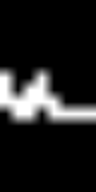

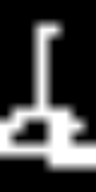

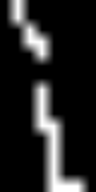

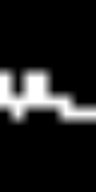

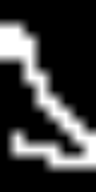

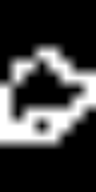

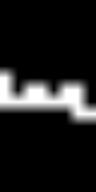

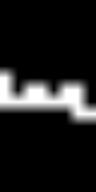

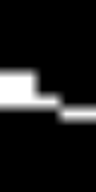

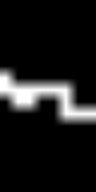

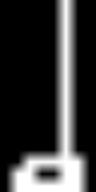

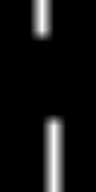

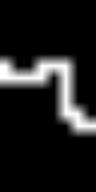

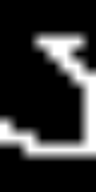

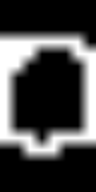

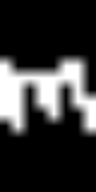

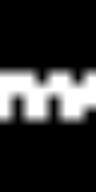

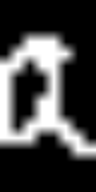

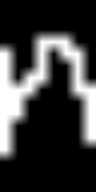

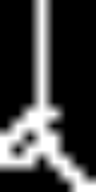

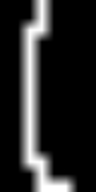

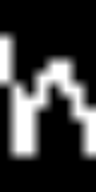

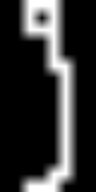

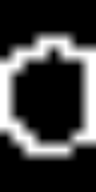

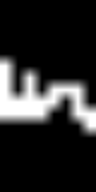

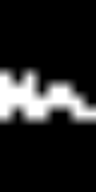

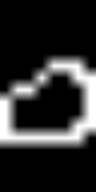

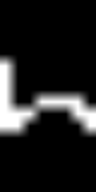

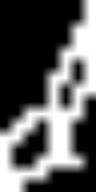

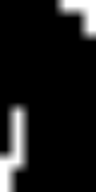

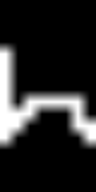

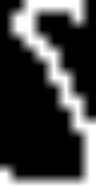

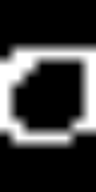

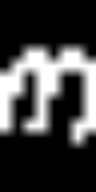

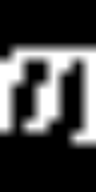

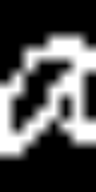

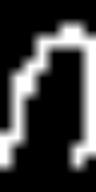

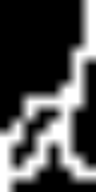

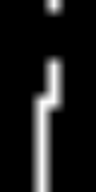

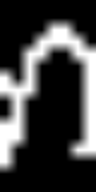

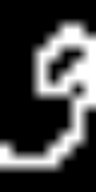

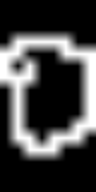

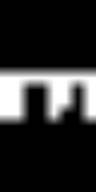

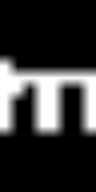

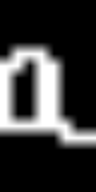

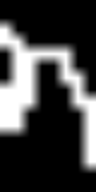

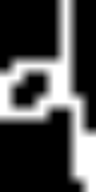

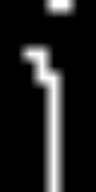

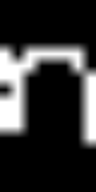

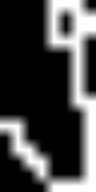

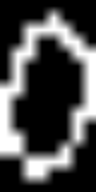

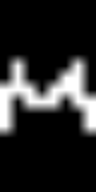

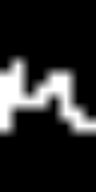

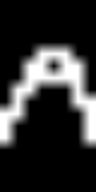

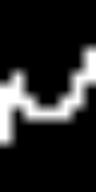

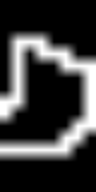

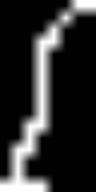

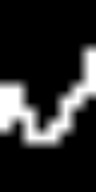

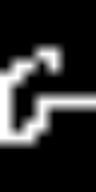

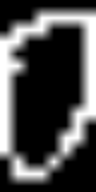

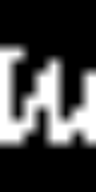

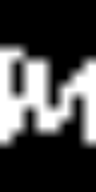

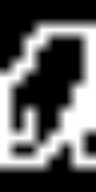

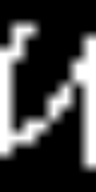

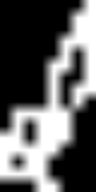

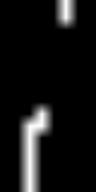

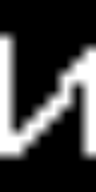

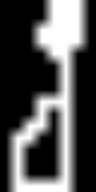

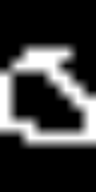

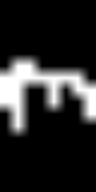

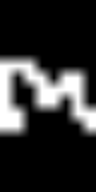

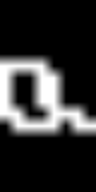

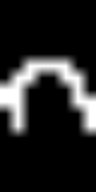

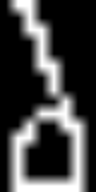

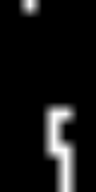

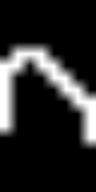

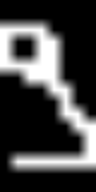

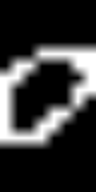

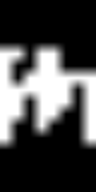

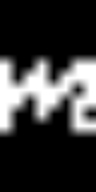

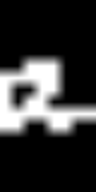

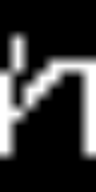

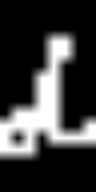

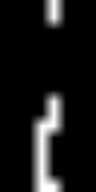

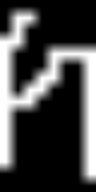

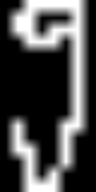

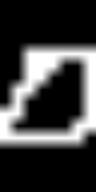

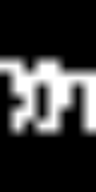

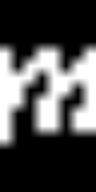

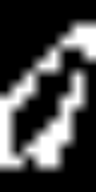

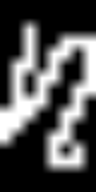

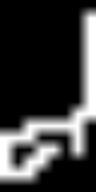

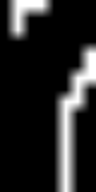

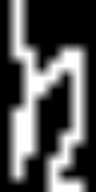

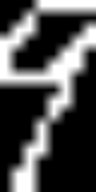

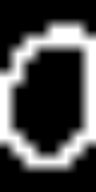

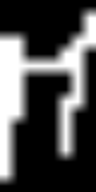

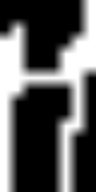

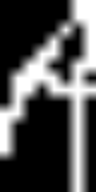

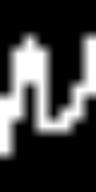

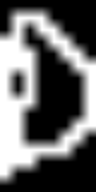

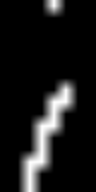

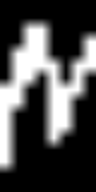

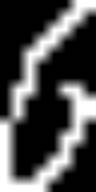

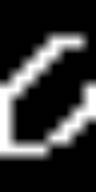

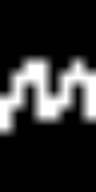

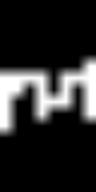

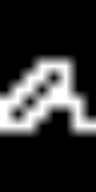

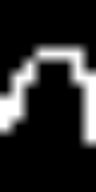

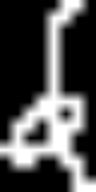

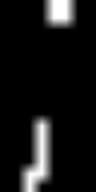

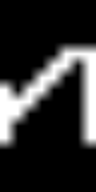

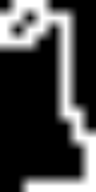

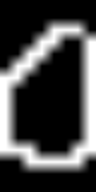

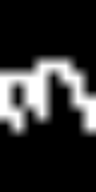

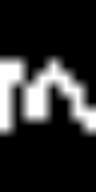

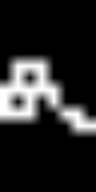

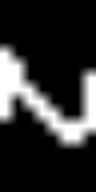

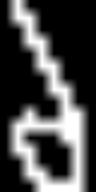

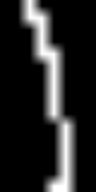

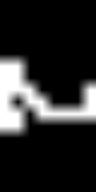

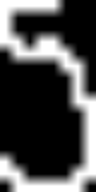

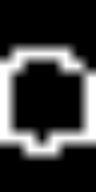

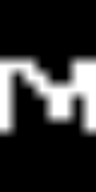

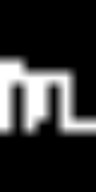

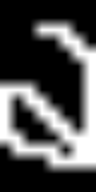

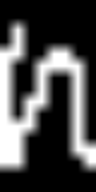

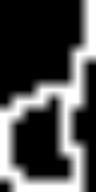

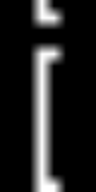

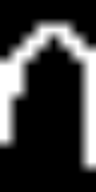

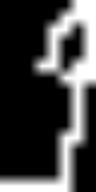

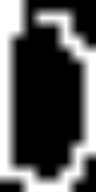

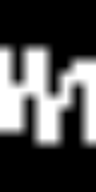

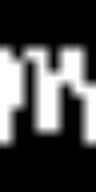

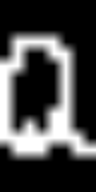

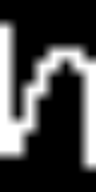

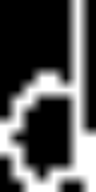

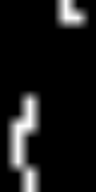

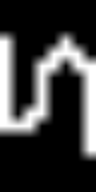

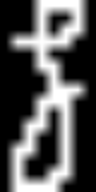

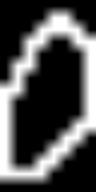

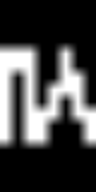

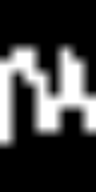

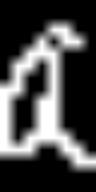

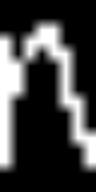

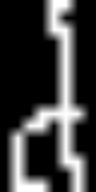

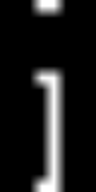

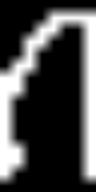

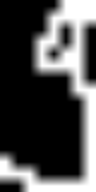

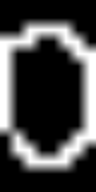

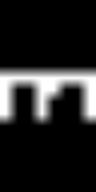

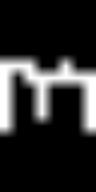

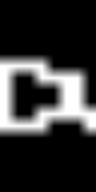

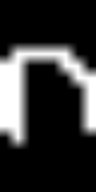

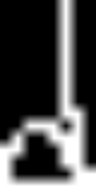

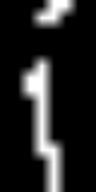

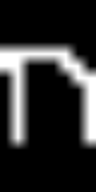

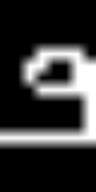

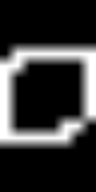

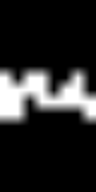

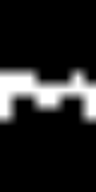

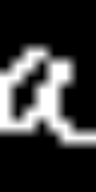

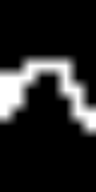

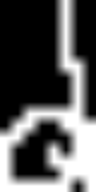

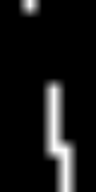

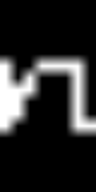

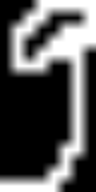

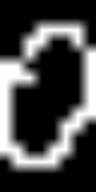

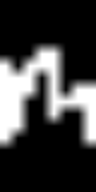

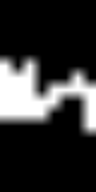

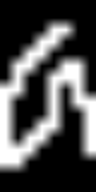

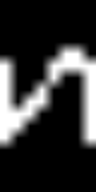

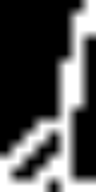

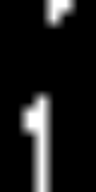

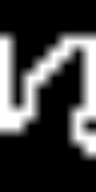

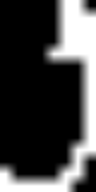

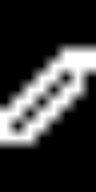

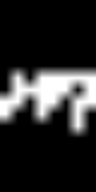

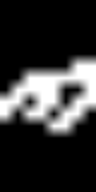

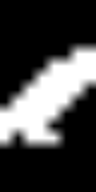

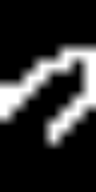

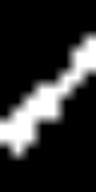

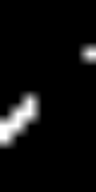

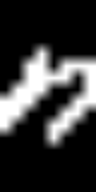

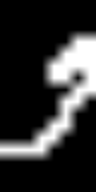

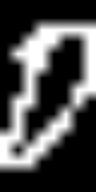

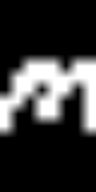

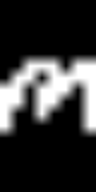

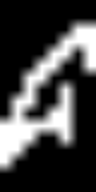

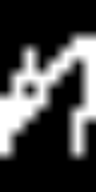

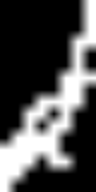

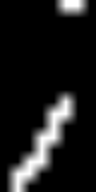

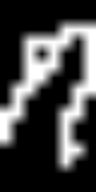

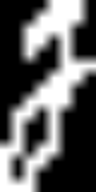

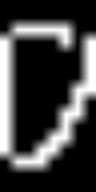

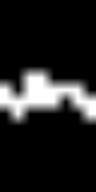

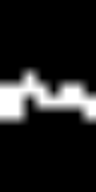

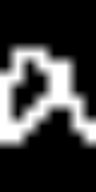

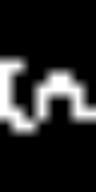

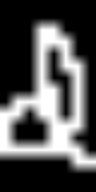

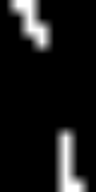

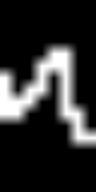

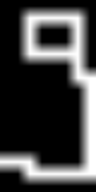

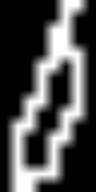

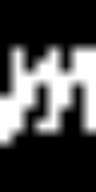

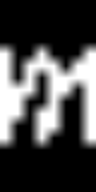

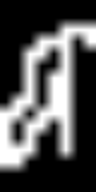

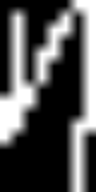

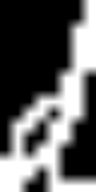

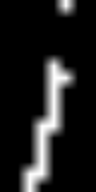

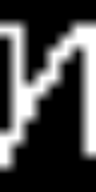

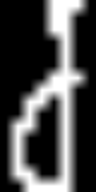

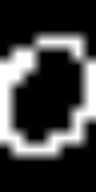

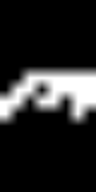

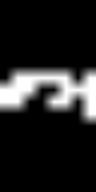

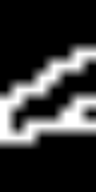

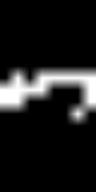

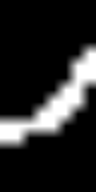

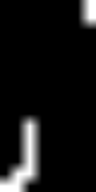

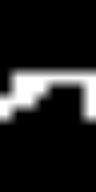

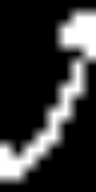

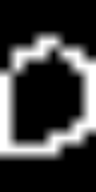

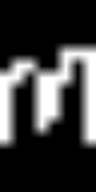

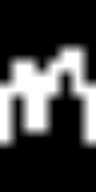

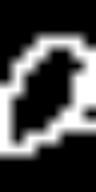

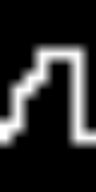

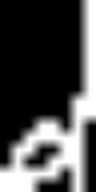

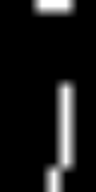

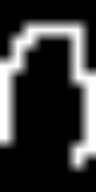

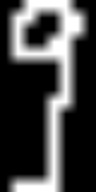

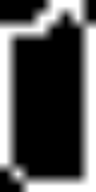

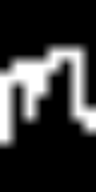

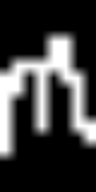

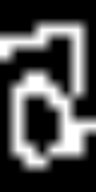

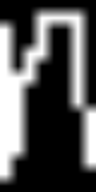

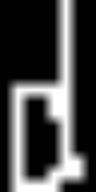

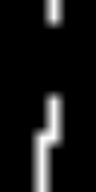

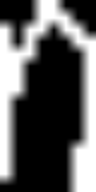

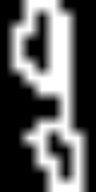

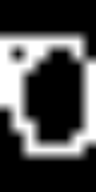

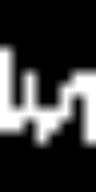

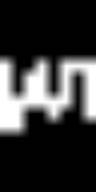

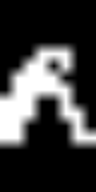

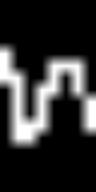

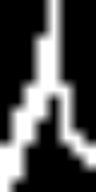

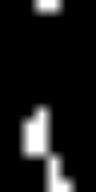

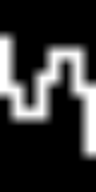

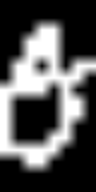

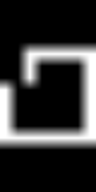

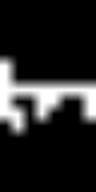

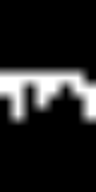

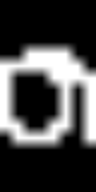

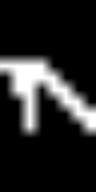

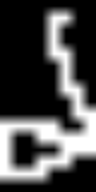

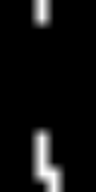

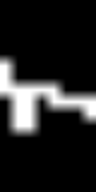

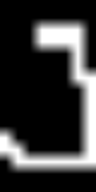

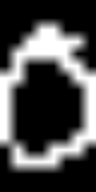

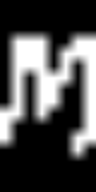

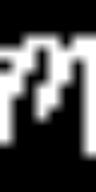

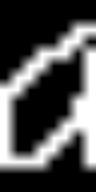

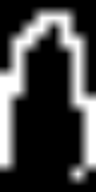

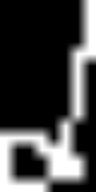

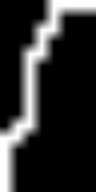

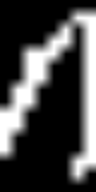

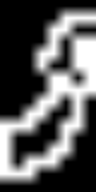

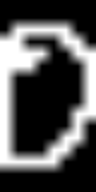

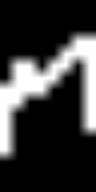

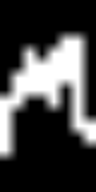

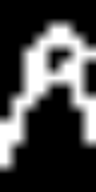

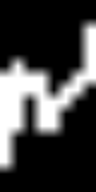

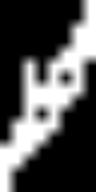

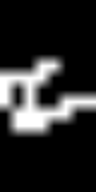

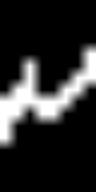

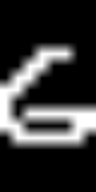

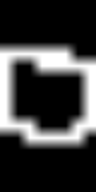

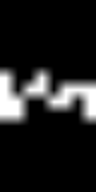

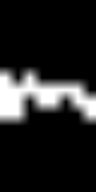

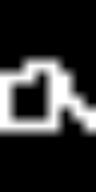

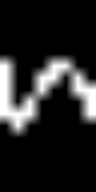

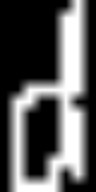

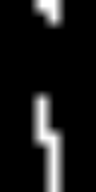

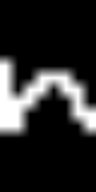

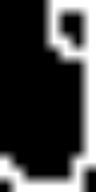

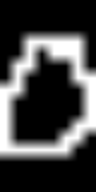

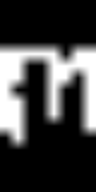

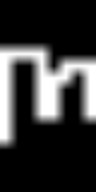

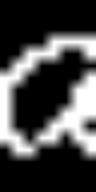

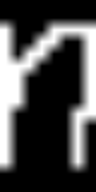

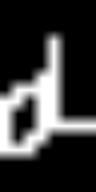

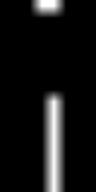

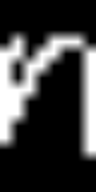

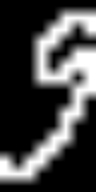

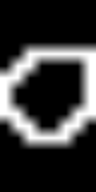

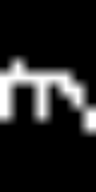

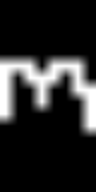

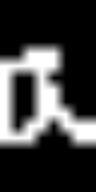

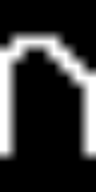

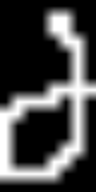

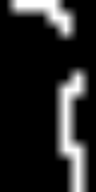

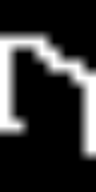

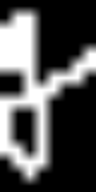

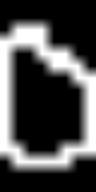

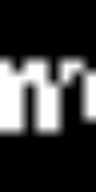

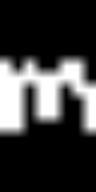

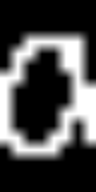

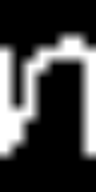

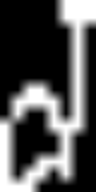

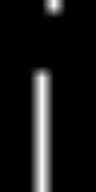

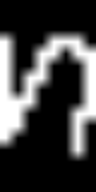

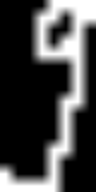

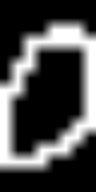

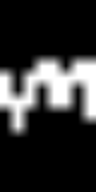

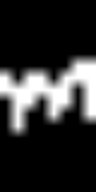

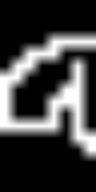

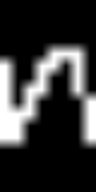

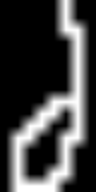

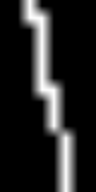

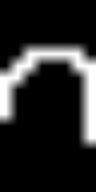

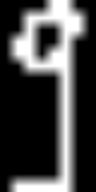

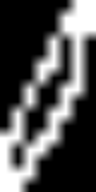

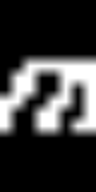

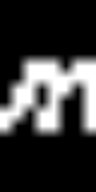

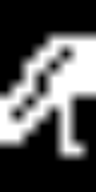

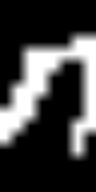

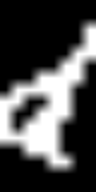

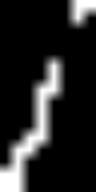

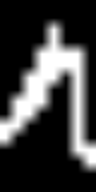

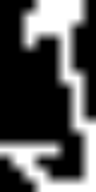

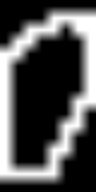

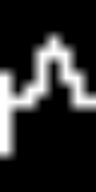

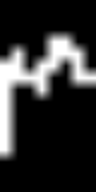

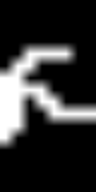

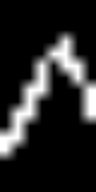

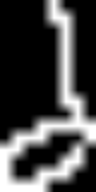

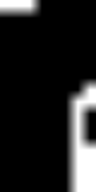

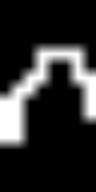

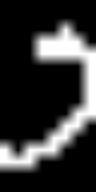

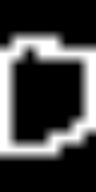

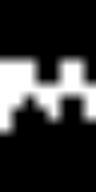

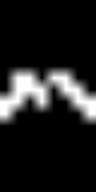

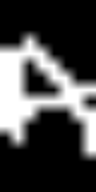

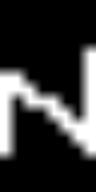

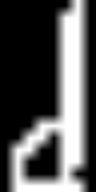

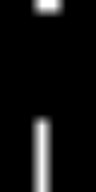

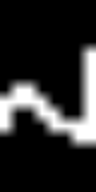

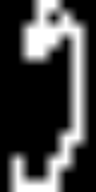

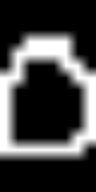

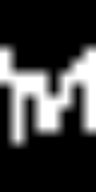

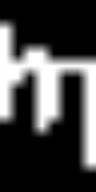

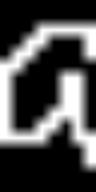

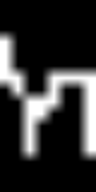

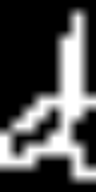

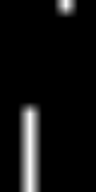

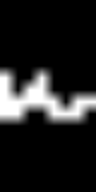

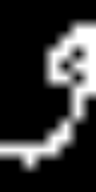

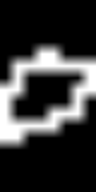

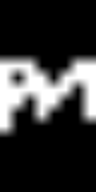

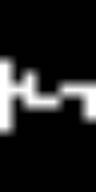

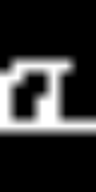

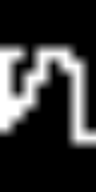

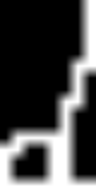

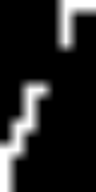

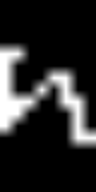

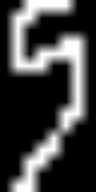

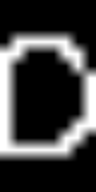

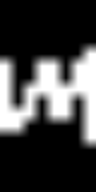

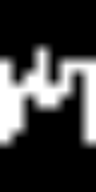

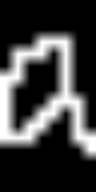

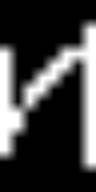

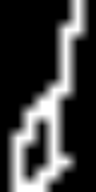

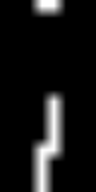

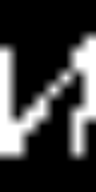

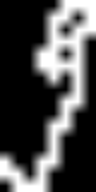

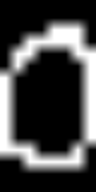

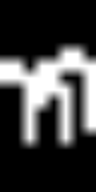

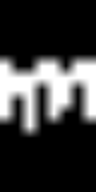

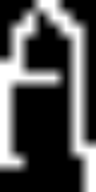

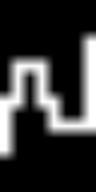

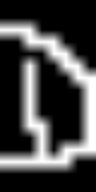

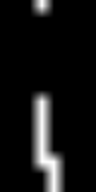

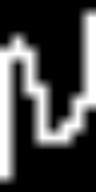

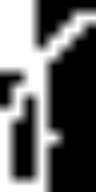

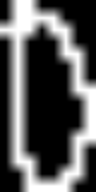

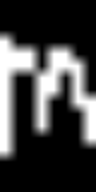

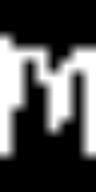

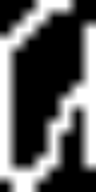

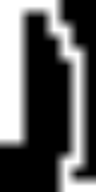

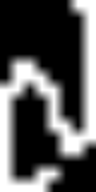

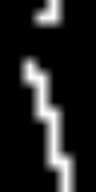

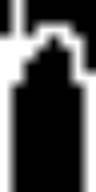

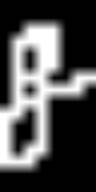

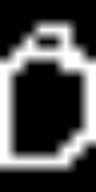

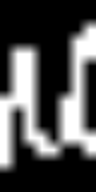

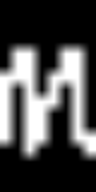

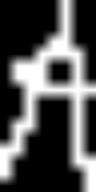

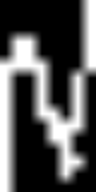

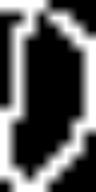

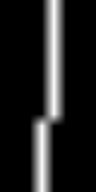

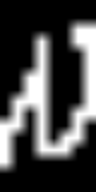

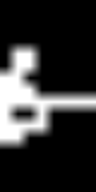

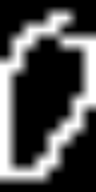

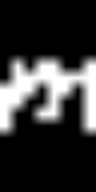

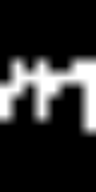

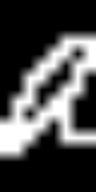

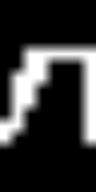

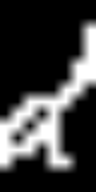

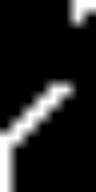

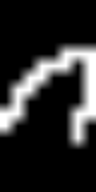

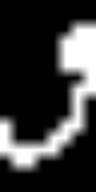

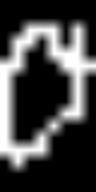

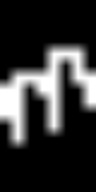

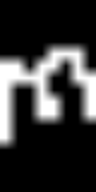

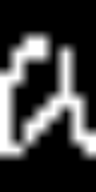

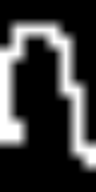

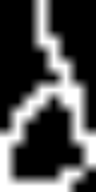

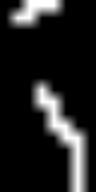

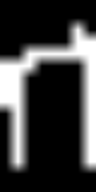

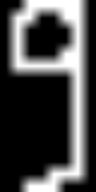

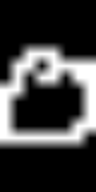

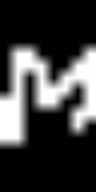

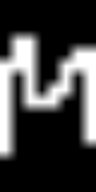

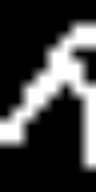

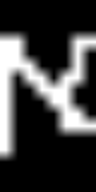

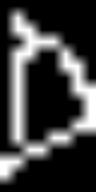

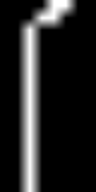

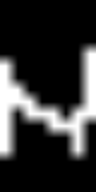

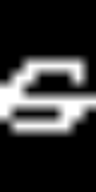

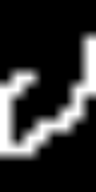

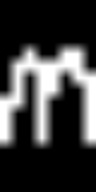

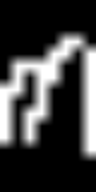

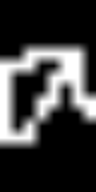

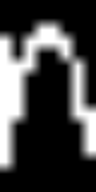

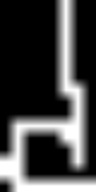

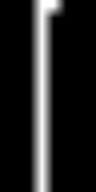

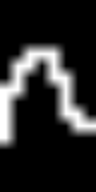

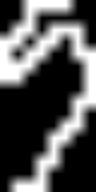

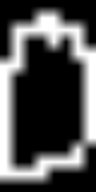

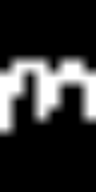

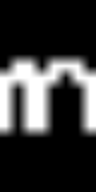

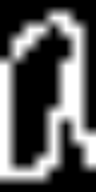

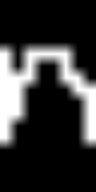

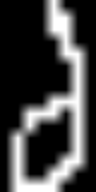

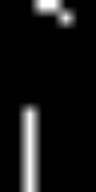

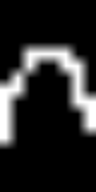

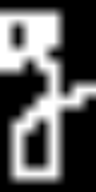

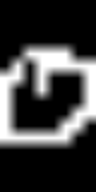

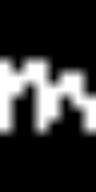

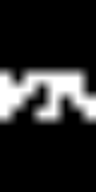

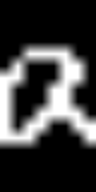

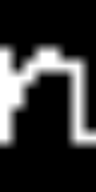

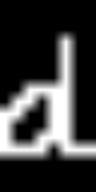

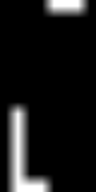

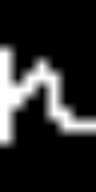

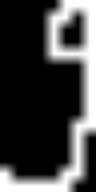

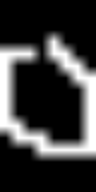

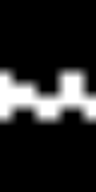

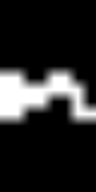

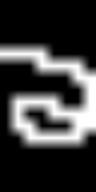

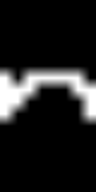

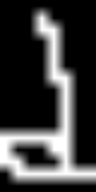

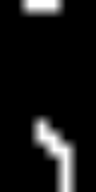

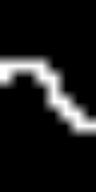

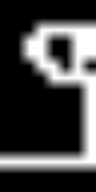

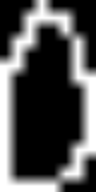

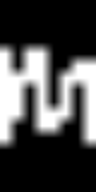

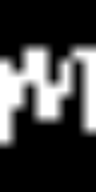

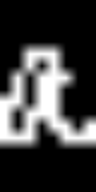

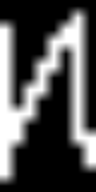

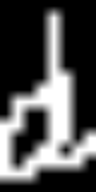

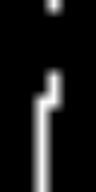

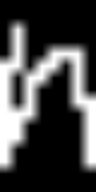

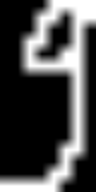

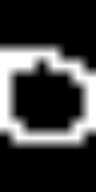

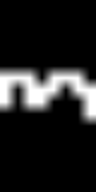

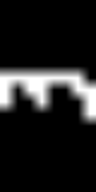

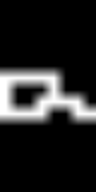

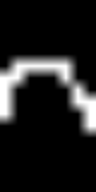

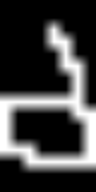

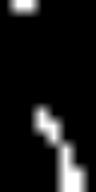

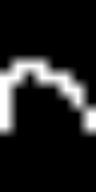

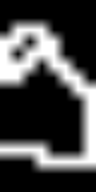

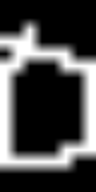

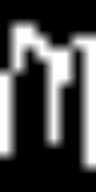

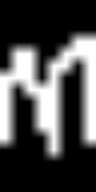

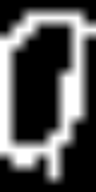

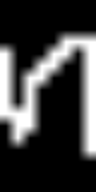

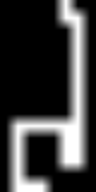

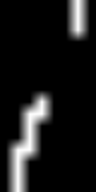

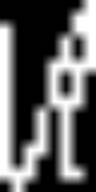

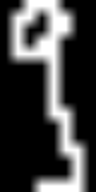

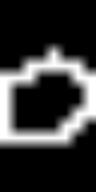

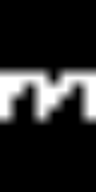

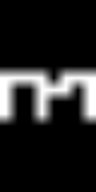

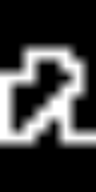

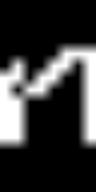

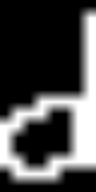

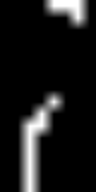

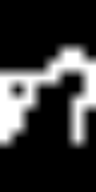

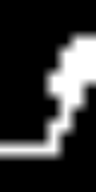

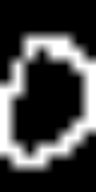

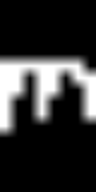

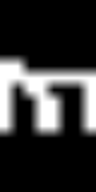

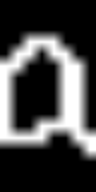

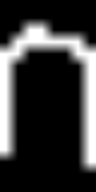

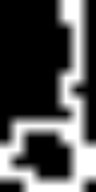

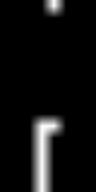

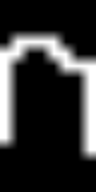

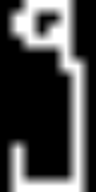

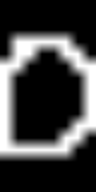

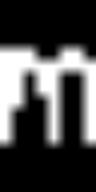

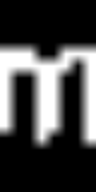

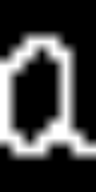

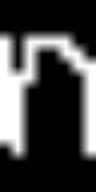

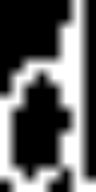

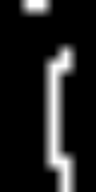

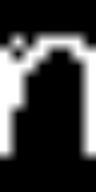

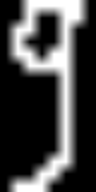

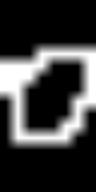

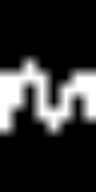

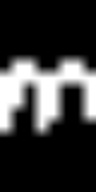

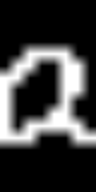

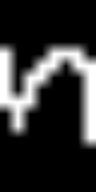

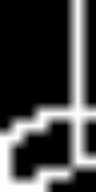

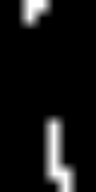

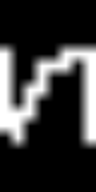

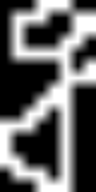

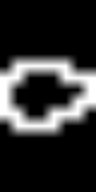

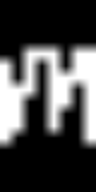

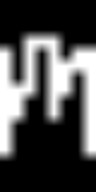

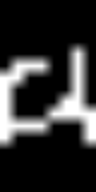

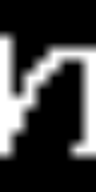

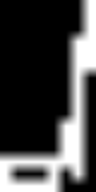

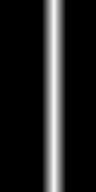

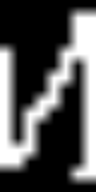

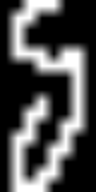

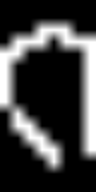

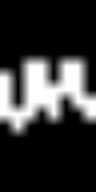

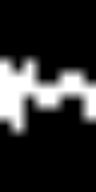

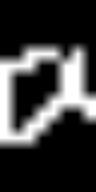

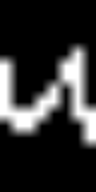

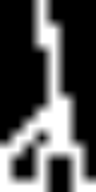

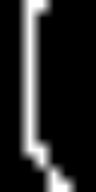

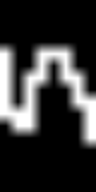

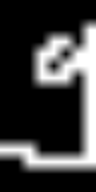

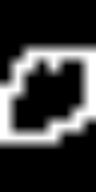

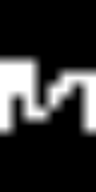

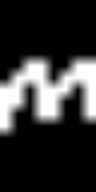

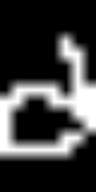

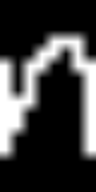

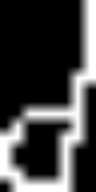

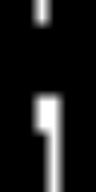

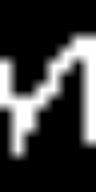

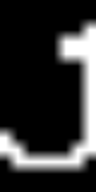

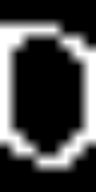

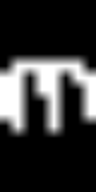

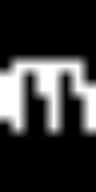

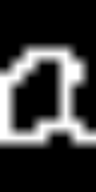

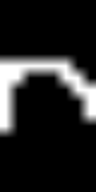

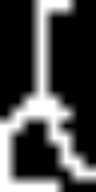

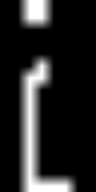

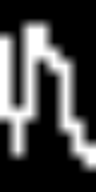

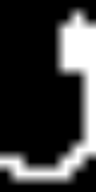

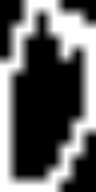

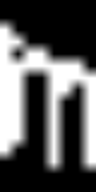

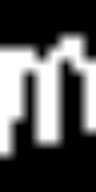

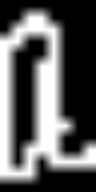

KeyboardInterrupt: 

In [ ]:
import os
import sys

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

input_file = '/content/Artificial-Intelligence-with-Python/Chapter 14/code/letter.data'

img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

with open(input_file, 'r') as f:
    for line in f.readlines():
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

        img = np.reshape(data, (height, width))

        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)

        cv2_imshow(img_scaled)

        c = cv2.waitKey()
        if c == 27:
            break

## Часть 7. Создание системы оптического распознавания символов

In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

fatal: destination path 'Artificial-Intelligence-with-Python' already exists and is not an empty directory.


In [ ]:
!pip install neurolab

In [ ]:
import numpy as np
import neurolab as nl

# Определение входного файла
input_file = '/content/Artificial-Intelligence-with-Python/Chapter 14/code/letter.data'

# Определим количество точек данных, подлежащих
# загрузке из входного файла
num_datapoints = 50

# Строка, содержащая все различные символы
orig_labels = 'omandig'

# Вычисление количества различных классов
num_orig_labels = len(orig_labels)

# Определение параметров тренировочных и тестовых данных
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

# Определение параметров извлечения данных
start = 6
end = -1

# Создание набора данных
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Разбиение текущей строки по символам табуляции
        list_vals = line.split('\t')

        # Проверка того, присутствует ли данная метка в нашем
        # базовом списке меток. Если она отсутствует,
        # мы ее пропускаем.
        if list_vals[1] not in orig_labels:
            continue

        # Извлечение текущей метки и ее присоединение
        # к основному списку
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        # Извлечение символьного вектора и его присоединение к основному списку.
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)

        # Выход из цикла, как только создание требуемого набора данных завершено
        if len(data) >= num_datapoints:
            break

# Преобразование данных и меток в массивы NumPy
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Извлечение количества измерений
num_dims = len(data[0])

# Создание нейронной сети
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))],
        [128, 16, num_orig_labels])

# Задание градиентного спуска в качестве обучающего алгоритма
nn.trainf = nl.train.train_gd

# Обучение сети
error_progress = nn.train(data[:num_train,:], labels[:num_train,:],
        epochs=10000, show=1000, goal=0.01)

# Предсказание результата для тестовых данных
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])

Epoch: 1000; Error: 6.445519707929511;
Epoch: 2000; Error: 0.6287983356153047;
Epoch: 3000; Error: 0.1414369931391414;
Epoch: 4000; Error: 0.06941709469781193;
Epoch: 5000; Error: 0.03301321618797931;
Epoch: 6000; Error: 0.03324737263568393;
Epoch: 7000; Error: 0.02866147127309267;
Epoch: 8000; Error: 0.016136170121264677;
Epoch: 9000; Error: 0.021431834361398998;
Epoch: 10000; Error: 0.021757532391733548;
The maximum number of train epochs is reached

Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: m

Original: a
Predicted: o

Original: n
Predicted: n


In [ ]:
import operator
import math
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp

In [ ]:
# определение новых функций
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1
    return numerator / denominator

In [ ]:
# определение оценочной функции
def eval_func(individual, points):
    func = toolbox.compile(expr=individual)

    mse = []
    for x, y in points:
        result = 2.2 - (x / 11) + 7 * math.cos(y)
        mse.append((func(x, y) - result)**2)
    return math.fsum(mse) / len(points),

In [ ]:
# функция для создания набора инструментов
def create_toolbox():
    pset = gp.PrimitiveSet("МAIN", 2)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
    pset.renameArguments(ARG0='x')
    pset.renameArguments(ARG1='y')
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[(x, y) for x in range(-100,100) for y in range(-100,100)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

In [ ]:
if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.3 #0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)

/usr/local/lib/python3.10/dist-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


   	      	                              fitness                              	                      size                     
   	      	-------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max        	min    	nevals	std        	avg	gen	max	min	nevals	std    
0  	450   	1.05878e+12	0  	4.76381e+14	46.9789	450   	2.24318e+13	3.6	0  	7  	2  	450   	1.57762
1  	217   	356303     	1  	4.44483e+07	46.9789	217   	2.88177e+06	3.40889	1  	13 	1  	217   	1.75041
2  	207   	151507     	2  	1.9988e+07 	46.9789	207   	1.40483e+06	3.45556	2  	15 	1  	207   	2.0394 
3  	206   	25720.5    	3  	1.11126e+07	44.9505	206   	523382     	3.27556	3  	10 	1  	206   	1.73323
4  	176   	25616.9    	4  	1.1112e+07 	44.9505	176   	523359     	3.27333	4  	10 	1  	176   	1.86511
5  	211   	24902.2    	5  	1.1112e+07 	44.9505	211   	523232     	3.26   	5  	12 	1  	211   	1.90355
6  	218   	187608     	6  	3.11353e+07	44.9505	

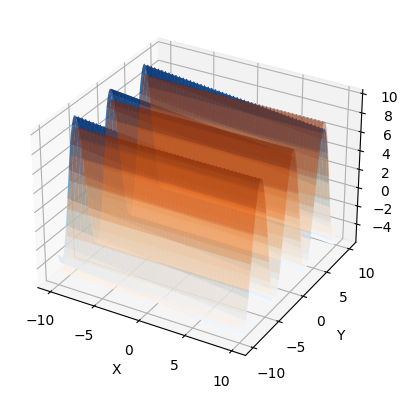

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

best_individual = hall_of_fame[0]
compiled_func = toolbox.compile(expr=best_individual)

def f(x, y):
    return 2.2 - (x / 11) + 7 * np.cos(y)

x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_values, y_values)

func = f(X, Y)
approxfunc = np.array([[compiled_func(x, y) for x in x_values] for y in y_values])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, func, cmap='Blues', alpha=0.8)
ax.plot_surface(X, Y, approxfunc, cmap='Oranges', alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
import operator
import math
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp

данные

In [ ]:
X1 = np.array([4.72, 4.79, 4.85, 4.9, 4.85, 4.83, 4.79, 4.73, 4.71, 4.79, 4.65, 4.43, 4.71, 4.83, 4.88, 4.48, 4.9, 4.71, 4.32])
X2 = np.array([1410, 1412, 1409, 1433, 1421, 1414, 1380, 1359, 1391, 1431, 1385, 1390, 1390, 1410, 1370, 1410, 1405, 1397, 1391])
X3 = np.array([0.6, 0.62, 0.64, 0.59, 0.61, 0.64, 0.47, 0.52, 0.47, 0.56, 0.49, 0.59, 0.65, 0.53, 0.74, 0.53, 0.45, 0.76, 0.64])
X4 = np.array([20438, 21157, 21137, 20357, 20111, 20494, 19872, 20832, 17927, 19281, 19393, 20251, 20739, 18843, 20280, 19724,
               20337, 20371, 19956])
X5 = np.array([11542, 12042, 12572, 10792, 11452, 10396, 9227, 10037, 8543, 9838, 6507, 9656, 10991, 7119, 8101, 9284, 10555,
               10614, 12493])
X6 = np.array([536678.3, 665595.7, 685155.1, 643414.1, 648320.9, 556028.1, 578510, 609717, 555254, 571542.7, 542657.9,
               606522.4, 662882, 541723.3, 596816.7, 582055.6, 548312.7, 640469.2, 583138])
X7 = np.array([20790.43, 22246.75, 22685.08, 22090.15, 20751.6, 22060.92, 20826.56, 22073.04, 17035.87, 20259.55,
               20345.29, 21857.73, 18875.11, 19135.35, 21863.88, 19207.21, 21408.35, 20210.1, 19923.71])
X8 = np.array([1083, 1119, 1133, 1096, 1084, 1091, 1023, 1073, 926, 990, 1001, 1041, 1065, 970, 1043, 1016, 1051, 1050, 1032])
X9 = np.array([5694.549, 5533.067, 5689.137, 5863.039, 5530.319, 5445.745, 5222.486, 4883.346, 3923.648, 4128.302, 3941.009,
               4986.875, 4960.803, 5142.251, 4281.973, 6163.142, 5652.739, 5651.67, 4656.095])
Y = np.array([1656, 1680, 1677, 1664, 1630, 1651, 1639, 1637, 1615, 1617, 1598, 1654, 1658, 1638, 1639, 1608, 1642, 1700, 1657])

In [ ]:
# определение новых функций
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1
    return numerator / denominator

In [ ]:
# определение оценочной функции
def eval_func(individual, points):
    func = toolbox.compile(expr=individual)

    func = toolbox.compile(expr=individual)
    mse = ((func(*point) - Y[i])**2 for i, point in enumerate(points))
    return math.fsum(mse) / len(points),

In [ ]:
# функция для создания набора инструментов
def create_toolbox():
    pset = gp.PrimitiveSet("МAIN", 9)  # Создание набора примитивов с двумя аргументами (х, у)
    pset.addPrimitive(operator.add, 2)  # Добавление операции сложения в набор
    pset.addPrimitive(operator.sub, 2)  # Добавление операции вычитания в набор
    pset.addPrimitive(operator.mul, 2)  # Добавление операции умножения в набор
    pset.addPrimitive(division_operator, 2)  # Добавление пользовательской операции деления в набор
    pset.addPrimitive(operator.neg, 1)  # Добавление операции унарного отрицания в набор
    pset.addPrimitive(math.cos, 1)  # Добавление функции косинуса в набор
    pset.addPrimitive(math.sin, 1)  # Добавление функции синуса в набор
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))  # Добавление случайной константы из диапазона [-1, 1]
    pset.renameArguments(ARG0='x1')  # Переименование первого аргумента в наборе в 'x1'
    pset.renameArguments(ARG1='x2')  # Переименование второго аргумента в наборе в 'x2'
    pset.renameArguments(ARG2='x3')
    pset.renameArguments(ARG3='x4')
    pset.renameArguments(ARG4='x5')
    pset.renameArguments(ARG5='x6')
    pset.renameArguments(ARG6='x7')
    pset.renameArguments(ARG7='x8')
    pset.renameArguments(ARG8='x9')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Создание класса FitnessMin для минимизации
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)  # Создание класса Individual для представления особи
    toolbox = base.Toolbox()  # Создание набора инструментов

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)  # Генерация выражения (генома) случайным образом
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)  # Создание индивида
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Создание начальной популяции
    toolbox.register("compile", gp.compile, pset=pset)  # Компиляция примитивного дерева в функцию
    toolbox.register("evaluate", eval_func, points=[(X1[i], X2[i], X3[i], X4[i], X5[i], X6[i], X7[i], X8[i], X9[i]) for i in range(0, len(X1))]) # Регистрация функции оценки для особи
    toolbox.register("select", tools.selTournament, tournsize=3)  # Регистрация операции селекции
    toolbox.register("mate", gp.cxOnePoint)  # Регистрация оператора скрещивания
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)  # Генерация нового выражения для мутации
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)  # Регистрация оператора мутации
    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))  # Ограничение высоты после скрещивания
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))  # Ограничение высоты после мутации

    return toolbox  # Возврат сформированного набора инструментов

In [ ]:
if __name__ == "__main__":  # Проверка на то, что скрипт запущен как основной (главный)
    random.seed(7)  # Инициализация генератора случайных чисел для воспроизводимости результатов

    toolbox = create_toolbox()  # Создание инструментов для выполнения генетического программирования

    population = toolbox.population(n=450)  # Создание начальной популяции из 10 индивидуумов
    hall_of_fame = tools.HallOfFame(1)  # Создание объекта "Зал Славы" для хранения лучшего индивидуума

    stats_fit = tools.Statistics(lambda x: x.fitness.values)  # Статистика для отслеживания приспособленности особей
    stats_size = tools.Statistics(len)  # Статистика для отслеживания размера индивидуумов

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)  # Комплексная статистика по приспособленности и размеру

    mstats.register("avg", np.mean)  # Регистрация среднего значения для статистики
    mstats.register("std", np.std)  # Регистрация стандартного отклонения для статистики
    mstats.register("min", np.min)  # Регистрация минимального значения для статистики
    mstats.register("max", np.max)  # Регистрация максимального значения для статистики

    # Определение параметров генетического алгоритма
    probab_crossover = 0.4  # Вероятность кроссовера
    probab_mutate = 0.2  # Вероятность мутации
    num_generations = 60  # Количество поколений

    # Запуск генетического алгоритма eaSimple с заданными параметрами
    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)

   	      	                             fitness                              	                      size                     
   	      	------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max        	min    	nevals	std       	avg 	gen	max	min	nevals	std    
0  	450   	9.23331e+26	0  	4.15499e+29	58532.4	450   	1.9565e+28	3.42	0  	7  	2  	450   	1.42331
1  	230   	3.24779e+17	1  	1.4615e+20 	58532.4	230   	6.88194e+18	3.58667	1  	10 	1  	230   	1.6473 
2  	233   	4.19399e+22	2  	1.88726e+25	58532.4	233   	8.88676e+23	3.87111	2  	14 	1  	233   	1.85743
3  	228   	1.26583e+14	3  	4.2856e+16 	17144.9	228   	2.09081e+15	3.78222	3  	14 	1  	228   	1.88836
4  	228   	2.16029e+16	4  	9.7071e+18 	17144.9	228   	4.57087e+17	3.97111	4  	12 	1  	228   	1.93254
5  	229   	2.95205e+20	5  	1.32842e+23	17144.9	229   	6.25528e+21	3.96   	5  	13 	1  	229   	1.9421 
6  	255   	9.89165e+21	6  	4.4506e+24 	17144.9	25

In [ ]:
best_individual = hall_of_fame[0]
compiled_func = toolbox.compile(expr=best_individual)

approxfunc = np.array([compiled_func(X1[i], X2[i], X3[i], X4[i], X5[i], X6[i], X7[i], X8[i], X9[i]) for i in range(0, len(X1))])
diff = np.array([abs(approxfunc[i] - Y[i]) for i in range(0, len(Y))])
print(diff)

[1.15545310e+00 3.92602215e+00 2.87478175e+00 1.17326497e+01
 2.89565492e+01 1.35361838e+01 7.39003964e+00 2.17960453e-02
 2.24804142e+01 3.69818566e+01 2.40912757e+01 7.89785796e+00
 1.00061618e+01 9.28844514e+00 6.52982841e+00 3.44018164e+01
 1.52089131e+01 5.26348608e+01 2.22605135e+01]


In [ ]:
gp.graph(hall_of_fame[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [(0, 1),
  (0, 2),
  (2, 3),
  (2, 4),
  (4, 5),
  (4, 6),
  (6, 7),
  (6, 8),
  (8, 9),
  (8, 10),
  (10, 11),
  (11, 12),
  (12, 13),
  (12, 14),
  (14, 15),
  (14, 16),
  (16, 17),
  (17, 18),
  (18, 19),
  (19, 20),
  (20, 21),
  (21, 22),
  (22, 23),
  (23, 24),
  (22, 25),
  (25, 26),
  (25, 27),
  (21, 28),
  (20, 29),
  (19, 30),
  (30, 31),
  (18, 32),
  (32, 33),
  (32, 34),
  (34, 35),
  (35, 36),
  (36, 37),
  (35, 38),
  (38, 39),
  (38, 40),
  (34, 41),
  (16, 42),
  (10, 43)],
 {0: 'add',
  1: 'x2',
  2: 'division_operator',
  3: 'x4',
  4: 'division_operator',
  5: 'x8',
  6: 'division_operator',
  7: 'x7',
  8: 'add',
  9: 'x2',
  10: 'add',
  11: 'neg',
  12: 'division_operator',
  13: 'x8',
  14: 'division_operator'

Количество ребер:  43
Количество вершин:  44


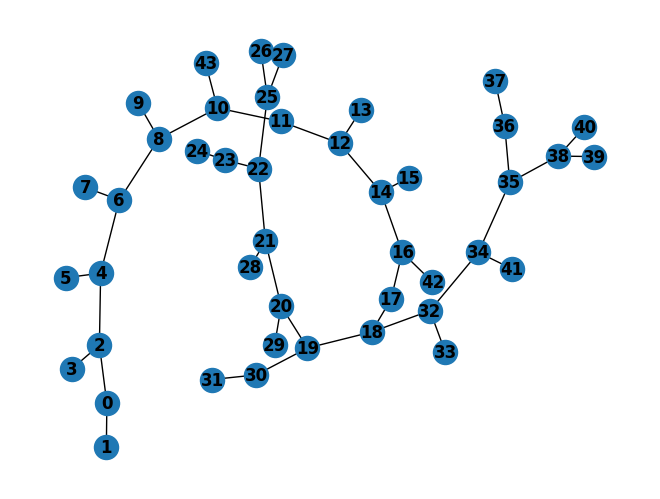

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()


draw_graph(hall_of_fame[0])

In [ ]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)


add(x2, division_operator(x4, division_operator(x8, division_operator(x7, add(x2, add(neg(division_operator(x8, division_operator(x7, add(neg(sub(add(sub(division_operator(add(sin(x1), mul(x6, -1)), x2), x2), neg(x4)), division_operator(x7, sub(add(neg(x8), mul(x9, x3)), x2)))), x2)))), x2))))))
